## Connect to Google Drive and import required libraries


In [ ]:
# Mount Google Drive to access datasets stored in your Drive
from google.colab import drive
drive.mount('/content/drive')

# Import essential libraries for data analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure default styles for visualisations using Seaborn
sns.set_theme(style='whitegrid', context='notebook')

# Ensure plots are displayed inline
%matplotlib inline

Mounted at /content/drive


# 2.DATA UNDERSTANDING
# 3.DATA PREPARATION

# HOUSE PRICE DATASET

## 2.Data Understanding

### 2.1 Collect initial data


In [ ]:
# Import the House Price Index dataset from Google Drive, loading only the 'Average price' sheet
price_index_path = '/content/drive/MyDrive/Final Project 2025/price_index.xlsx'

# Load only the 'Average price' sheet using pandas
df_price = pd.read_excel(price_index_path, sheet_name='Average price')



### 2.2 Describe Data


In [ ]:
# Display basic information about the dataset
df_price.info()

# Show the first five rows to get an overview of the data
df_price.head()

# Get summary statistics for numeric columns
df_price.describe()

# List all column names
df_price.columns

# Show the shape of the dataset (rows, columns)
df_price.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            363 non-null    datetime64[ns]
 1   City of London        364 non-null    object        
 2   Barking & Dagenham    364 non-null    object        
 3   Barnet                364 non-null    object        
 4   Bexley                364 non-null    object        
 5   Brent                 364 non-null    object        
 6   Bromley               364 non-null    object        
 7   Camden                364 non-null    object        
 8   Croydon               364 non-null    object        
 9   Ealing                364 non-null    object        
 10  Enfield               364 non-null    object        
 11  Greenwich             364 non-null    object        
 12  Hackney               364 non-null    object        
 13  Hammersmith & Fulham

(364, 49)

### 2.3 Explore Data


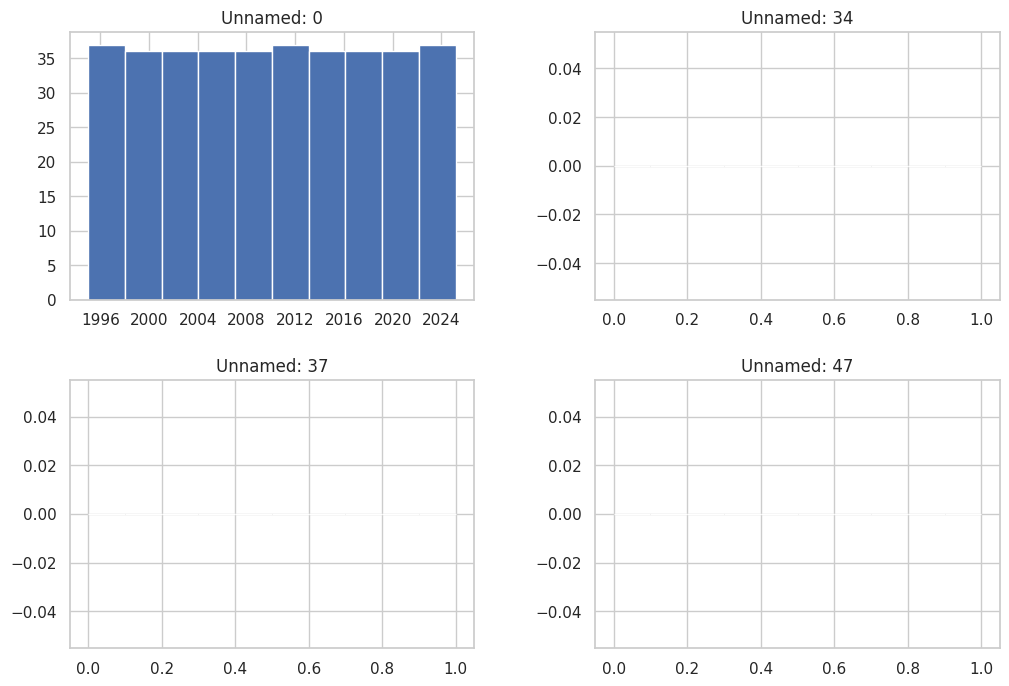

In [ ]:
# Check for missing values in each column
df_price.isnull().sum()

# Count unique values for each column
df_price.nunique()

# Get the frequency of each value in a specific column (replace 'City of London' as an example)
df_price['City of London'].value_counts()

# Calculate the correlation matrix for numeric columns
df_price.corr(numeric_only=True)

# Plot histograms for all numeric columns
df_price.hist(figsize=(12, 8))

# Boxplot for a specific numeric column (replace 'City of London' with your column of interest)
import seaborn as sns
#sns.boxplot(data=df_price['City of London'])


### 2.4 Verify Data Quality


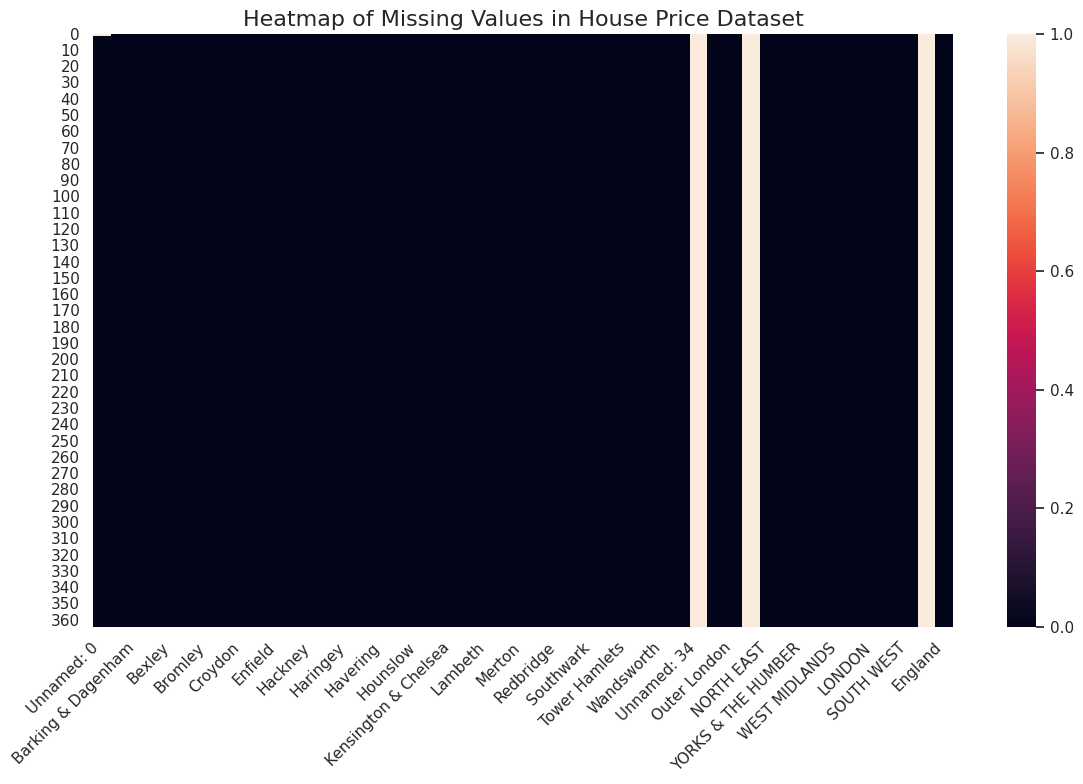

In [ ]:
# Check for duplicate rows
df_price.duplicated().sum()

# Show all unique categories in a categorical column (replace 'City of London' as an example)
df_price['City of London'].unique()

# Detect outliers using the IQR method for a specific column (replace 'City of London' with your column of interest)
#Q1 = df_price['City of London'].quantile(0.25)
#Q3 = df_price['City of London'].quantile(0.75)
#IQR = Q3 - Q1
#outliers = df_price[(df_price['City of London'] < Q1 - 1.5 * IQR) | (df_price['City of London'] > Q3 + 1.5 * IQR)]
#print(f"Number of outliers in 'City of London': {len(outliers)}")

# Visualize missing data as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df_price.isnull(), cbar=True)
plt.title('Heatmap of Missing Values in House Price Dataset', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##3.Data Preparation

### 3.1 Select Data


In [ ]:
# Select only the columns required for London borough house price analysis
selected_columns = [
    'Unnamed: 0',  # Date column
    'City of London', 'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden',
    'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
    'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
    'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge',
    'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest',
    'Wandsworth', 'Westminster',
    'Inner London', 'Outer London', 'LONDON', 'England'
]

df_boroughs = df_price[selected_columns].copy()


### 3.2 Clean Data


In [ ]:
# Rename the date column to 'Date' for clarity
df_boroughs = df_boroughs.rename(columns={'Unnamed: 0': 'Date'})

# Remove duplicate rows, if any exist
df_boroughs = df_boroughs.drop_duplicates()

# Convert all columns except the date column to numeric, coercing errors to NaN
for col in df_boroughs.columns[1:]:
    df_boroughs[col] = pd.to_numeric(df_boroughs[col], errors='coerce')

# Handle missing values in numeric columns by filling with the median value of each column
df_boroughs = df_boroughs.fillna(df_boroughs.median(numeric_only=True))

# Review the cleaned dataframe structure and contents
df_boroughs.info()
df_boroughs.head()
df_boroughs.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  363 non-null    datetime64[ns]
 1   City of London        364 non-null    float64       
 2   Barking & Dagenham    364 non-null    float64       
 3   Barnet                364 non-null    float64       
 4   Bexley                364 non-null    float64       
 5   Brent                 364 non-null    float64       
 6   Bromley               364 non-null    float64       
 7   Camden                364 non-null    float64       
 8   Croydon               364 non-null    float64       
 9   Ealing                364 non-null    float64       
 10  Enfield               364 non-null    float64       
 11  Greenwich             364 non-null    float64       
 12  Hackney               364 non-null    float64       
 13  Hammersmith & Fulham

,Date,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Inner London,Outer London,LONDON,England
count,363,3.640000e+02,364.000000,364.00000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,3.640000e+02,364.000000,364.000000,364.000000,364.000000
mean,2010-01-30 14:48:35.702479360,4.920937e+05,193091.228022,371616.07967,222842.895604,335758.653846,297823.351648,527592.967033,244261.579670,338033.263736,...,361978.928571,254196.225275,323816.142857,272567.087912,446975.450549,6.650729e+05,399214.958791,290214.956044,329176.653846,166065.403846
min,1995-01-01 00:00:00,7.617200e+04,51870.000000,95577.00000,63721.000000,76880.000000,82525.000000,114314.000000,68950.000000,84813.000000,...,70277.000000,70050.000000,65716.000000,62213.000000,99265.000000,1.397620e+05,83294.000000,75813.000000,77913.000000,49410.000000
25%,2002-07-16 12:00:00,2.631948e+05,117859.750000,243628.25000,139136.250000,206120.500000,195505.000000,305280.000000,161910.250000,217134.500000,...,217766.750000,170418.750000,209228.250000,156159.750000,278051.750000,3.731450e+05,238851.750000,184324.000000,207997.750000,105860.750000
50%,2010-02-01 00:00:00,4.482410e+05,173371.000000,356287.00000,201333.000000,319970.000000,280286.000000,505176.000000,223338.000000,320531.000000,...,345478.000000,237222.000000,312037.000000,232335.000000,434925.000000,6.278400e+05,378217.000000,271064.000000,310560.000000,167823.000000
75%,2017-08-16 12:00:00,7.700652e+05,298734.000000,558221.75000,334155.500000,519311.250000,441574.000000,809031.250000,371116.750000,508199.000000,...,566926.250000,376117.000000,489419.250000,444937.750000,681792.250000,1.027400e+06,629574.250000,441269.750000,506032.250000,227600.000000
max,2025-03-01 00:00:00,1.021539e+06,370501.000000,645194.00000,417727.000000,599334.000000,529819.000000,886331.000000,430260.000000,593867.000000,...,622328.000000,456273.000000,572680.000000,522556.000000,767904.000000,1.224972e+06,692477.000000,517160.000000,581320.000000,295654.000000
std,NaN,2.725229e+05,95824.312258,173169.45415,107367.823099,164133.402067,136250.970695,260001.854763,111665.566043,158951.687621,...,182145.944192,117006.671536,153445.683232,150273.746157,215743.245032,3.523873e+05,202333.380229,138416.830054,160264.709927,71955.617200


### 3.3 Format and Aggregate Data



In [ ]:
# Ensure the 'Date' column is correctly formatted as datetime
df_boroughs['Date'] = pd.to_datetime(df_boroughs['Date'], errors='coerce')

# Optionally, set 'Date' as index for time series analysis (uncomment if needed)
# df_boroughs = df_boroughs.set_index('Date')

# Remove any rows where the 'Date' column is null (NaT)
df_boroughs = df_boroughs[df_boroughs['Date'].notnull()]

# Add a 'Year' column extracted from the 'Date' column
df_boroughs['Year'] = df_boroughs['Date'].dt.year

# Group by 'Year' and calculate the mean for each borough and region
df_boroughs_annual = df_boroughs.groupby('Year').mean(numeric_only=True).reset_index()

# Filter to keep only years from 2010 to 2025 (inclusive)
df_boroughs_annual = df_boroughs_annual[df_boroughs_annual['Year'].between(2010, 2025)].reset_index(drop=True)

# Review the first rows of the aggregated (annual) dataset
df_boroughs_annual.head()

,Year,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Inner London,Outer London,LONDON,England
0,2010,448197.916667,171212.666667,353351.916667,200868.666667,312193.500000,275729.916667,508307.833333,221673.666667,313290.916667,...,339244.750000,236048.166667,310382.750000,229331.333333,429661.666667,644971.916667,373364.083333,266981.583333,304618.500000,167557.916667
1,2011,458342.250000,168030.750000,359556.750000,200666.750000,322330.166667,279621.500000,549085.416667,218416.916667,323434.916667,...,360744.000000,235580.416667,315337.750000,228095.500000,443099.500000,672415.583333,388124.000000,270457.333333,311050.500000,165440.666667
2,2012,518999.500000,170496.500000,380399.000000,202540.750000,338662.250000,286895.500000,580554.250000,224895.166667,340971.166667,...,382195.166667,241459.666667,313351.250000,238236.250000,469708.250000,740891.500000,410627.666667,279171.916667,325370.416667,167572.666667
3,2013,563142.333333,178586.000000,397522.250000,213464.416667,366201.250000,301792.333333,661057.666667,237693.083333,361717.583333,...,416390.166667,254764.500000,339255.750000,262541.083333,524793.916667,839807.833333,455234.416667,295697.500000,352391.666667,172381.500000
4,2014,700840.250000,206790.750000,456489.916667,244452.583333,425534.250000,353864.666667,749244.166667,278641.166667,427997.666667,...,493744.000000,294322.666667,419599.583333,325185.000000,624738.916667,980910.916667,539888.916667,343131.000000,413366.750000,186722.500000


###  3.4 Save Prepared Data

## 4.Exploratory Visualizations

In [ ]:
# Import necessary library for file operations
import os

# Define the path to save the cleaned dataset in Google Drive
save_path = '/content/drive/MyDrive/Final Project 2025/house_price_prepared.csv'

# Ensure the directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save the prepared DataFrame (e.g., df_boroughs_annual) as CSV without the index
df_boroughs_annual.to_csv(save_path, index=False)

# Print confirmation message
print(f"Prepared dataset saved successfully at: {save_path}")
df_boroughs_annual.info()

Prepared dataset saved successfully at: /content/drive/MyDrive/Final Project 2025/house_price_prepared.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  16 non-null     int32  
 1   City of London        16 non-null     float64
 2   Barking & Dagenham    16 non-null     float64
 3   Barnet                16 non-null     float64
 4   Bexley                16 non-null     float64
 5   Brent                 16 non-null     float64
 6   Bromley               16 non-null     float64
 7   Camden                16 non-null     float64
 8   Croydon               16 non-null     float64
 9   Ealing                16 non-null     float64
 10  Enfield               16 non-null     float64
 11  Greenwich             16 non-null     float64
 12  Hackney               16 non-null     float64
 13  Hammersmith & Fulham

###4.1 London vs England

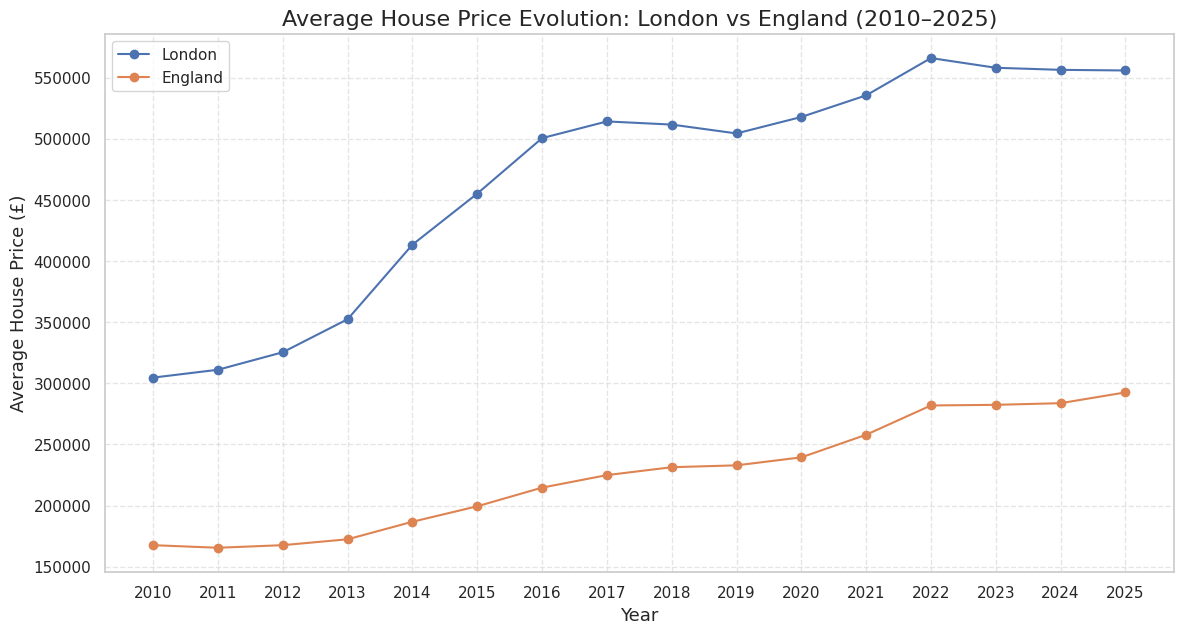

In [ ]:
# Plot the annual average house price in London and England separately

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(df_boroughs_annual['Year'], df_boroughs_annual['LONDON'], marker='o', label='London')
ax.plot(df_boroughs_annual['Year'], df_boroughs_annual['England'], marker='o', label='England')
ax.set_title('Average House Price Evolution: London vs England (2010–2025)', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Average House Price (£)', fontsize=13)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

# Ensure all years are set as xticks, centered below each data point, with no rotation
ax.set_xticks(df_boroughs_annual['Year'])
ax.set_xticklabels(df_boroughs_annual['Year'], rotation=0, ha='center', fontsize=11)

plt.tight_layout()
plt.subplots_adjust(bottom=0.17)  # Adjust bottom margin if needed

plt.show()

### 4.2 Boroughs vs London

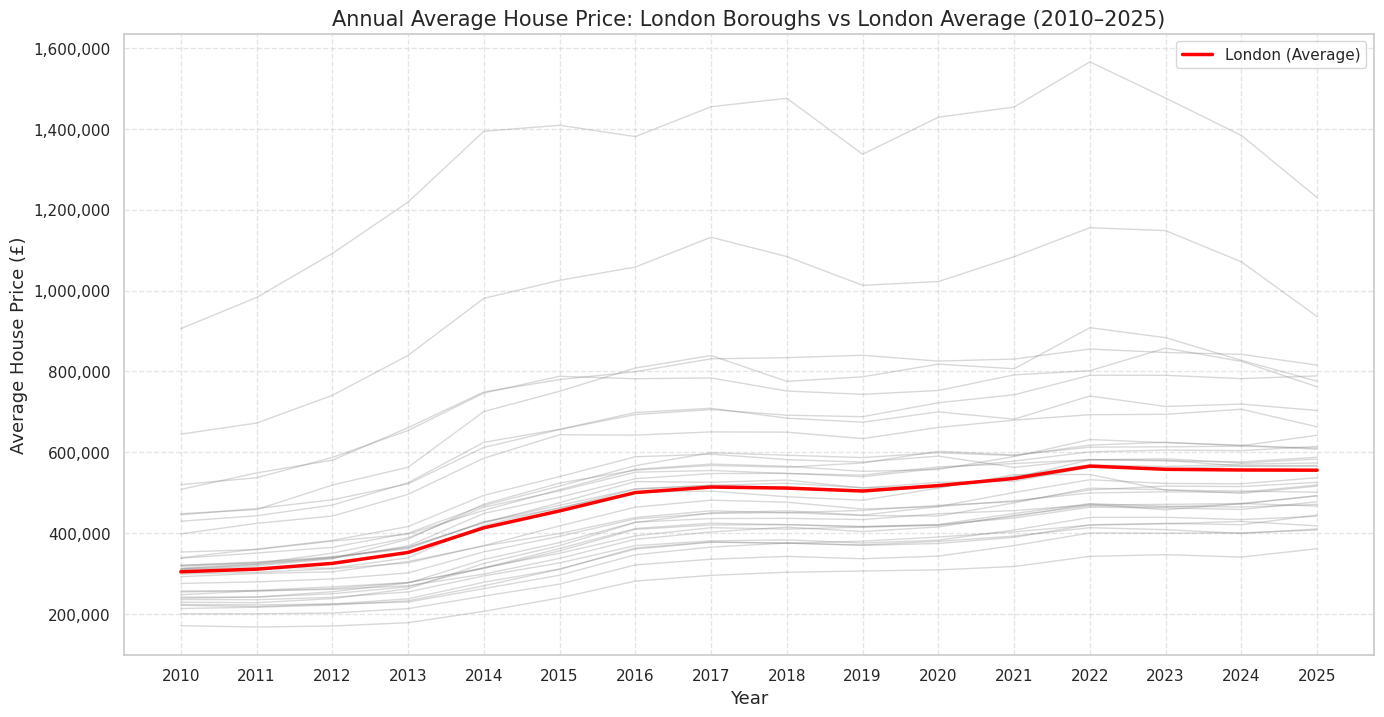

In [ ]:
# Plot the annual average house price for each London borough and highlight the London average

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(14, 8))

boroughs = [
    'City of London', 'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden',
    'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
    'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
    'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge',
    'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest',
    'Wandsworth', 'Westminster'
]

# Plot all boroughs in grey for context
for b in boroughs:
    ax.plot(df_boroughs_annual['Year'], df_boroughs_annual[b], color='grey', alpha=0.3, linewidth=1)

# Highlight the London average in red
ax.plot(df_boroughs_annual['Year'], df_boroughs_annual['LONDON'], color='red', linewidth=2.5, label='London (Average)')

ax.set_title('Annual Average House Price: London Boroughs vs London Average (2010–2025)', fontsize=15)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Average House Price (£)', fontsize=13)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

# Format y-axis with thousands separator (no scientific notation)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Ensure all years appear as xticks, centered below each point
ax.set_xticks(df_boroughs_annual['Year'])
ax.set_xticklabels(df_boroughs_annual['Year'], rotation=0, ha='center', fontsize=11)

plt.tight_layout()
plt.subplots_adjust(bottom=0.17)
plt.show()


### 4.3 London vs Inner London vs Outer London

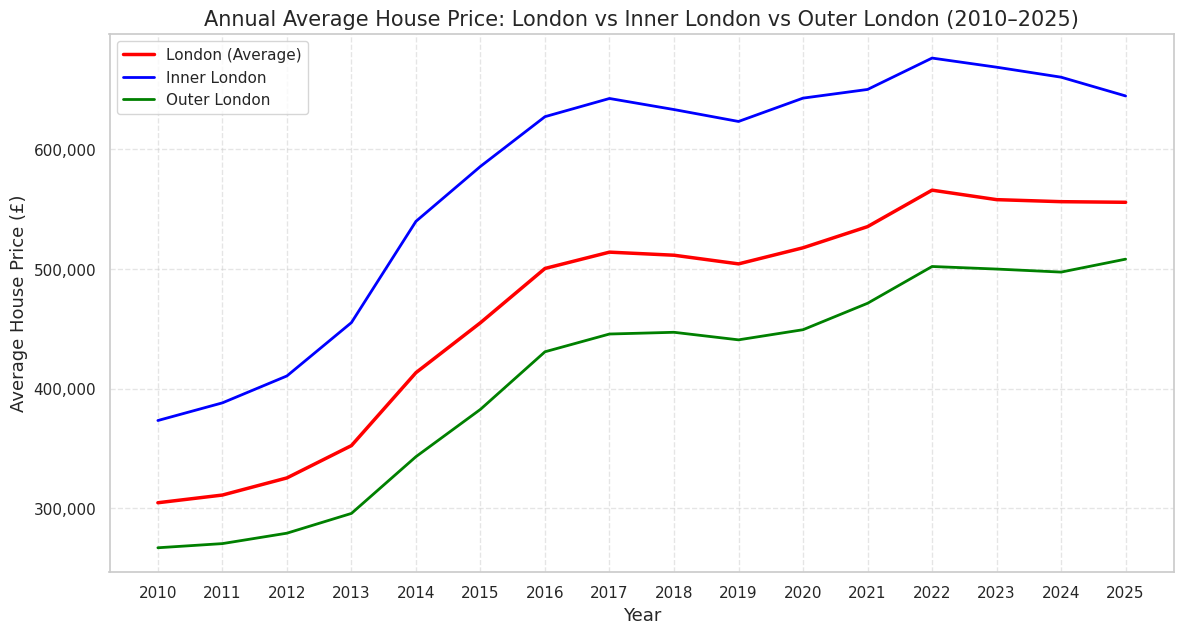

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(df_boroughs_annual['Year'], df_boroughs_annual['LONDON'], label='London (Average)', linewidth=2.5, color='red')
ax.plot(df_boroughs_annual['Year'], df_boroughs_annual['Inner London'], label='Inner London', linewidth=2, color='blue')
ax.plot(df_boroughs_annual['Year'], df_boroughs_annual['Outer London'], label='Outer London', linewidth=2, color='green')

ax.set_title('Annual Average House Price: London vs Inner London vs Outer London (2010–2025)', fontsize=15)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Average House Price (£)', fontsize=13)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

# Format y-axis with thousands separator (no scientific notation)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Force all years to appear as xticks and labels
years = df_boroughs_annual['Year']
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=0, ha='center', fontsize=11)

plt.tight_layout()
plt.subplots_adjust(bottom=0.17)
plt.show()



/tmp/ipython-input-128-4020393779.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([df_boroughs_annual[borough] for borough in boroughs_32], labels=boroughs_32, patch_artist=True)


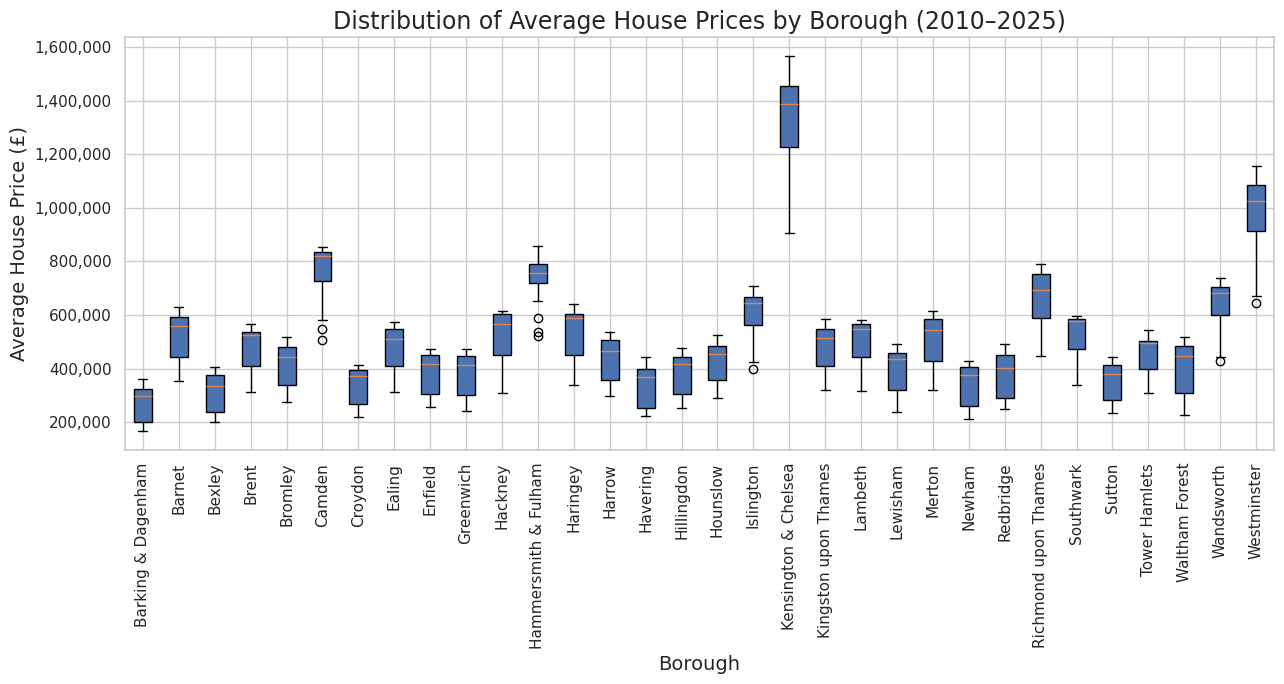

In [ ]:
import matplotlib.pyplot as plt

boroughs_32 = [
    'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden',
    'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
    'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
    'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge',
    'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest',
    'Wandsworth', 'Westminster'
]

fig, ax = plt.subplots(figsize=(13, 7))
ax.boxplot([df_boroughs_annual[borough] for borough in boroughs_32], labels=boroughs_32, patch_artist=True)
ax.set_title('Distribution of Average House Prices by Borough (2010–2025)', fontsize=17)
ax.set_ylabel('Average House Price (£)', fontsize=14)
ax.set_xlabel('Borough', fontsize=14)
ax.tick_params(axis='x', rotation=90)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()


###4.4 Average House Price by London Borough (2025)

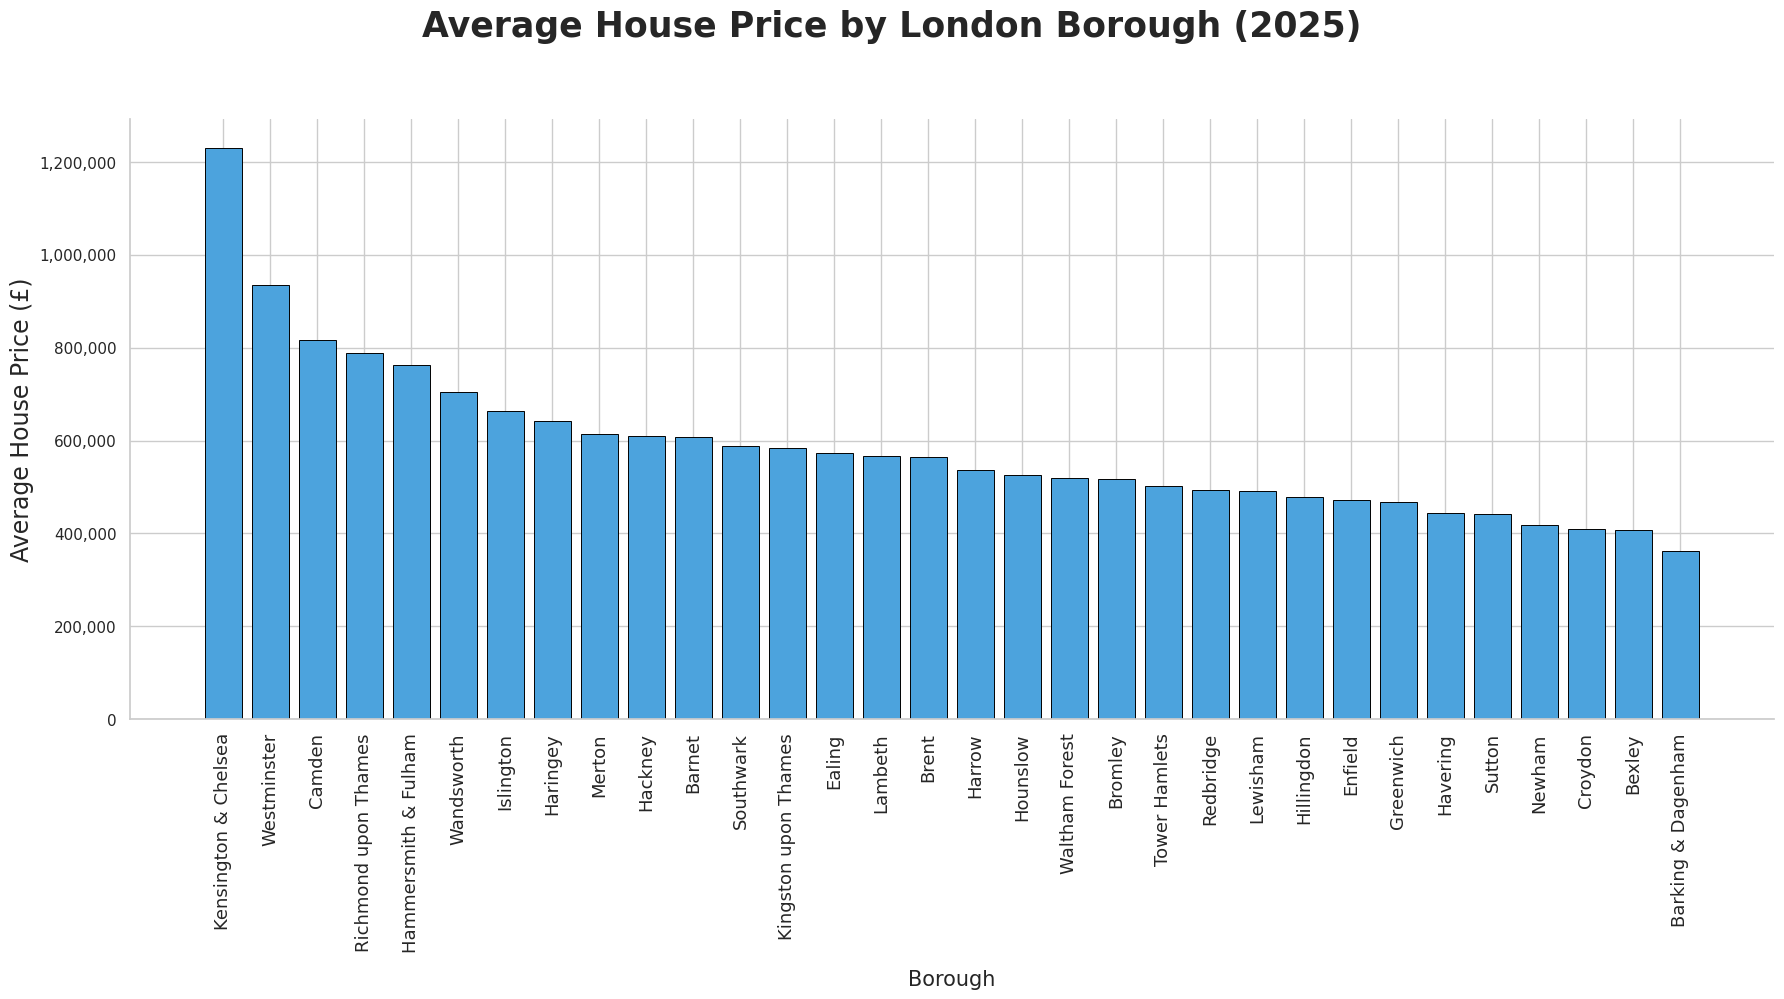

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define the list of 32 London boroughs (excluding City of London)
boroughs_32 = [
    'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden',
    'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
    'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
    'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge',
    'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest',
    'Wandsworth', 'Westminster'
]

# Extract and sort the 2025 average price data by borough
data_2025 = df_boroughs_annual[df_boroughs_annual['Year'] == 2025][boroughs_32].T
data_2025.columns = ['Average Price']
data_2025 = data_2025.sort_values('Average Price', ascending=False)

# Create the bar plot
fig, ax = plt.subplots(figsize=(18, 10))

# Plot the bars with a border for professional appearance
bars = ax.bar(data_2025.index, data_2025['Average Price'], color='#4CA3DD', edgecolor='black', linewidth=0.7)

# Add y-axis and x-axis labels with professional formatting
ax.set_ylabel('Average House Price (£)', fontsize=17)
ax.set_xlabel('Borough', fontsize=15, labelpad=12)

# Format y-axis ticks with thousands separator
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Set x-ticks and labels: rotation 90, centered
ax.set_xticks(range(len(data_2025.index)))
ax.set_xticklabels(data_2025.index, rotation=90, ha='center', fontsize=13)

# Remove the top and right spines for a cleaner look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add the main title outside the plot area
plt.suptitle('Average House Price by London Borough (2025)', fontsize=25, fontweight='bold', y=1.04)

# Adjust layout for clear visibility of labels and title
plt.tight_layout()
plt.subplots_adjust(top=0.93, bottom=0.33, right=0.99)
plt.show()



### 4.5 Annual House Price Evolution: 3 Most and Least Expensive Boroughs (2010–2025)

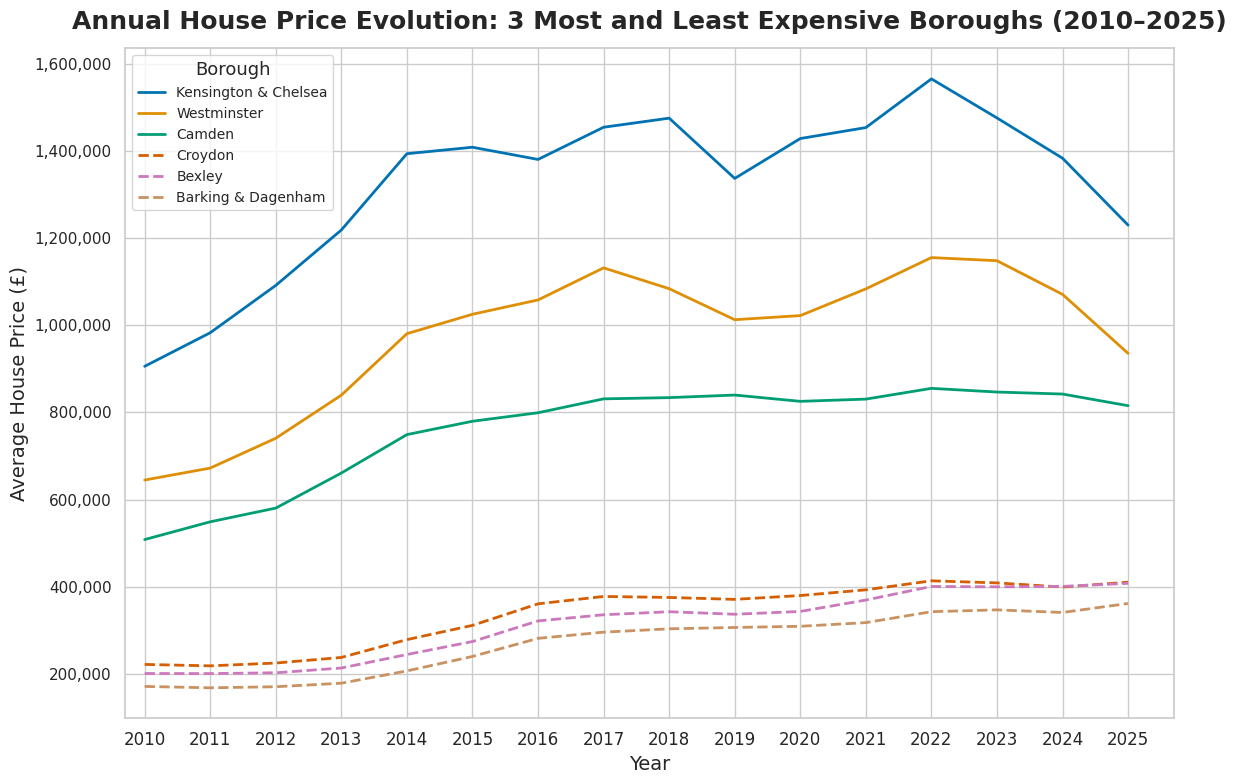

In [ ]:
# Import necessary libraries for visualization and styling
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set Seaborn style for clean, consistent, and professional plots
sns.set_theme(style='whitegrid', context='notebook')

# Define top 3 and bottom 3 boroughs based on 2025 prices for focused time series comparison
top3 = data_2025.index[:3]
bottom3 = data_2025.index[-3:]
years = df_boroughs_annual['Year']

# Create a figure with adequate size for report inclusion
plt.figure(figsize=(12, 8))

# Plot the top 3 boroughs with solid lines using a colorblind-friendly palette
palette = sns.color_palette("colorblind", n_colors=6)
for idx, b in enumerate(top3):
    plt.plot(years, df_boroughs_annual[b], label=b, linewidth=2, color=palette[idx])

# Plot the bottom 3 boroughs with dashed lines using the same palette
for idx, b in enumerate(bottom3, start=3):
    plt.plot(years, df_boroughs_annual[b], label=b, linewidth=2, linestyle='--', color=palette[idx])

# Add a clear, descriptive title with bold formatting
plt.title('Annual House Price Evolution: 3 Most and Least Expensive Boroughs (2010–2025)', fontsize=18, fontweight='bold', pad=14)

# Label the x-axis with units and set font size for legibility
plt.xlabel('Year', fontsize=14)

# Label the y-axis with units, rotated vertically and set font size
plt.ylabel('Average House Price (£)', fontsize=14)

# Ensure all years including 2025 appear as ticks on the x-axis with readable font size
plt.xticks(years, fontsize=12)

# Adjust x-axis limits to add padding on both sides for aesthetic spacing
plt.xlim(years.min() - 0.3, years.max() + 0.7)

# Format the y-axis ticks to display as currency with thousands separator, avoiding scientific notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add a legend placed inside the plot area for clarity, with title and adjusted font sizes
plt.legend(fontsize=10, title='Borough', title_fontsize=13)

# Use tight layout to ensure labels and titles fit without overlapping
plt.tight_layout()

# Display the final plot
plt.show()


### 4.6 Interactive Heatmap of Average House Prices Across London Boroughs (2010–2025)

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Step 1: Filter years 2010-2025 in your annual DataFrame
df_filtered = df_boroughs_annual[(df_boroughs_annual['Year'] >= 2010) & (df_boroughs_annual['Year'] <= 2025)]

# Step 2: List of 32 boroughs (exact names from your dataset)
boroughs_32 = [
    'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden',
    'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith & Fulham',
    'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
    'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
    'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
    'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'
]

# Step 3: Calculate mean price per borough between 2010 and 2025
average_price = df_filtered[boroughs_32].mean()

# Step 4: Approximate lat/lon coordinates for borough centroids (replace with precise data if available)
coords_data = {
    'borough': boroughs_32,
    'lat': [51.5366, 51.6529, 51.4565, 51.5582, 51.4053, 51.5416, 51.3720, 51.5123,
            51.6520, 51.4821, 51.5446, 51.4925, 51.5861, 51.5856, 51.5633, 51.5465,
            51.4740, 51.5270, 51.4995, 51.4126, 51.4615, 51.4573, 51.4051, 51.5340,
            51.5727, 51.4425, 51.4543, 51.3558, 51.5361, 51.5845, 51.4635, 51.4940],
    'lon': [0.0804, -0.2007, 0.1490, -0.2804, -0.0224, -0.1433, -0.0950, -0.3012,
            -0.0752, 0.0131, -0.0554, -0.2250, -0.1103, -0.3362, 0.1485, -0.4693,
            -0.3651, -0.1032, -0.1931, -0.3020, -0.1166, -0.0168, -0.2051, 0.0485,
            0.0700, -0.3036, -0.3114, -0.1913, -0.0353, -0.0128, -0.1927, -0.2097]
}

coords_df = pd.DataFrame(coords_data)

# Step 5: Assign a name to the series for joining
average_price.name = 'London'

# Step 6: Join average prices with coordinates dataframe
heatmap_df = coords_df.set_index('borough').join(average_price)

# Step 7: Normalize prices for heatmap intensity (0 to 1 scale)
heatmap_df['price_norm'] = (heatmap_df['London'] - heatmap_df['London'].min()) / (heatmap_df['London'].max() - heatmap_df['London'].min())

# Step 8: Create a base map centered on London
m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

# Step 9: Prepare heatmap points (latitude, longitude, normalized price)
heat_points = heatmap_df[['lat', 'lon', 'price_norm']].values.tolist()

# Step 10: Add heatmap layer with gradient from green (low) to red (high)
HeatMap(
    heat_points,
    radius=25,
    blur=15,
    gradient={0.0: 'blue', 0.5: 'yellow', 1.0: 'red'},
    max_val=1.0
).add_to(m)

# Step 11: Add circle markers with tooltips for exact average price values
for idx, row in heatmap_df.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=7,
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=folium.Popup(f"{idx.title()}: £{row['London']:,.0f}", max_width=200)
    ).add_to(m)

# Step 12: Display the interactive map
m


/tmp/ipython-input-131-1372558935.py:52: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(


# TEACHERS SALARY DATASET

## 2.Data Understanding

###2.1 Collect Initial Data — Teachers’ Salaries

In [ ]:
import pandas as pd

# Cargar el dataset CSV desde Google Drive
file_path = '/content/drive/MyDrive/Final Project 2025/Teachers_dataset.csv'
df_teachers = pd.read_csv(file_path)

# Mostrar las primeras filas para inspección visual inicial
print(df_teachers.head())

# Mostrar los nombres de las columnas para identificar variables relevantes
print(df_teachers.columns)

# Mostrar información básica del dataframe para conocer tipos y valores nulos
print(df_teachers.info())



   time_period time_identifier geographic_level country_code country_name  \
0       202425   Academic year         National    E92000001      England   
1       202425   Academic year         National    E92000001      England   
2       202425   Academic year         National    E92000001      England   
3       202425   Academic year         National    E92000001      England   
4       202425   Academic year         National    E92000001      England   

  region_code region_name  old_la_code new_la_code la_name  ...  \
0         NaN         NaN          NaN         NaN     NaN  ...   
1         NaN         NaN          NaN         NaN     NaN  ...   
2         NaN         NaN          NaN         NaN     NaN  ...   
3         NaN         NaN          NaN         NaN     NaN  ...   
4         NaN         NaN          NaN         NaN     NaN  ...   

  headcount_50_to_55k headcount_55_to_60k headcount_60_to_65k  \
0               64466               38308               24577   
1   

###2.2 Describe Data

In [ ]:
# Display basic information about the dataset
df_teachers.info()

# Show the first five rows to get an overview of the data
df_teachers.head()

# Get summary statistics for numeric columns
df_teachers.describe()

# List all column names
print(df_teachers.columns)

# Show the shape of the dataset (rows, columns)
print(df_teachers.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517449 entries, 0 to 517448
Data columns (total 34 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   time_period                               517449 non-null  int64  
 1   time_identifier                           517449 non-null  object 
 2   geographic_level                          517449 non-null  object 
 3   country_code                              517449 non-null  object 
 4   country_name                              517449 non-null  object 
 5   region_code                               469768 non-null  object 
 6   region_name                               469768 non-null  object 
 7   old_la_code                               432082 non-null  float64
 8   new_la_code                               432082 non-null  object 
 9   la_name                                   432082 non-null  object 
 10  school_type         

### 2.3 Explore Data

geographic_level
Local authority    432082
National            47681
Regional            37686
Name: count, dtype: int64
                                          time_period  old_la_code  \
time_period                                  1.000000    -0.000024   
old_la_code                                 -0.000024     1.000000   
headcount_all                               -0.005288     0.067157   
teachers_on_leadership_pay_range_percent     0.006111     0.000742   
headcount_under_25k                         -0.056251     0.088945   
headcount_25_to_30k                         -0.029041     0.055924   
headcount_30_to_35k                         -0.027611     0.075605   
headcount_35_to_40k                         -0.028012     0.092938   
headcount_40_to_45k                          0.021914     0.061630   
headcount_45_to_50k                          0.035381     0.023786   
headcount_50_to_55k                          0.035311    -0.006782   
headcount_55_to_60k                    

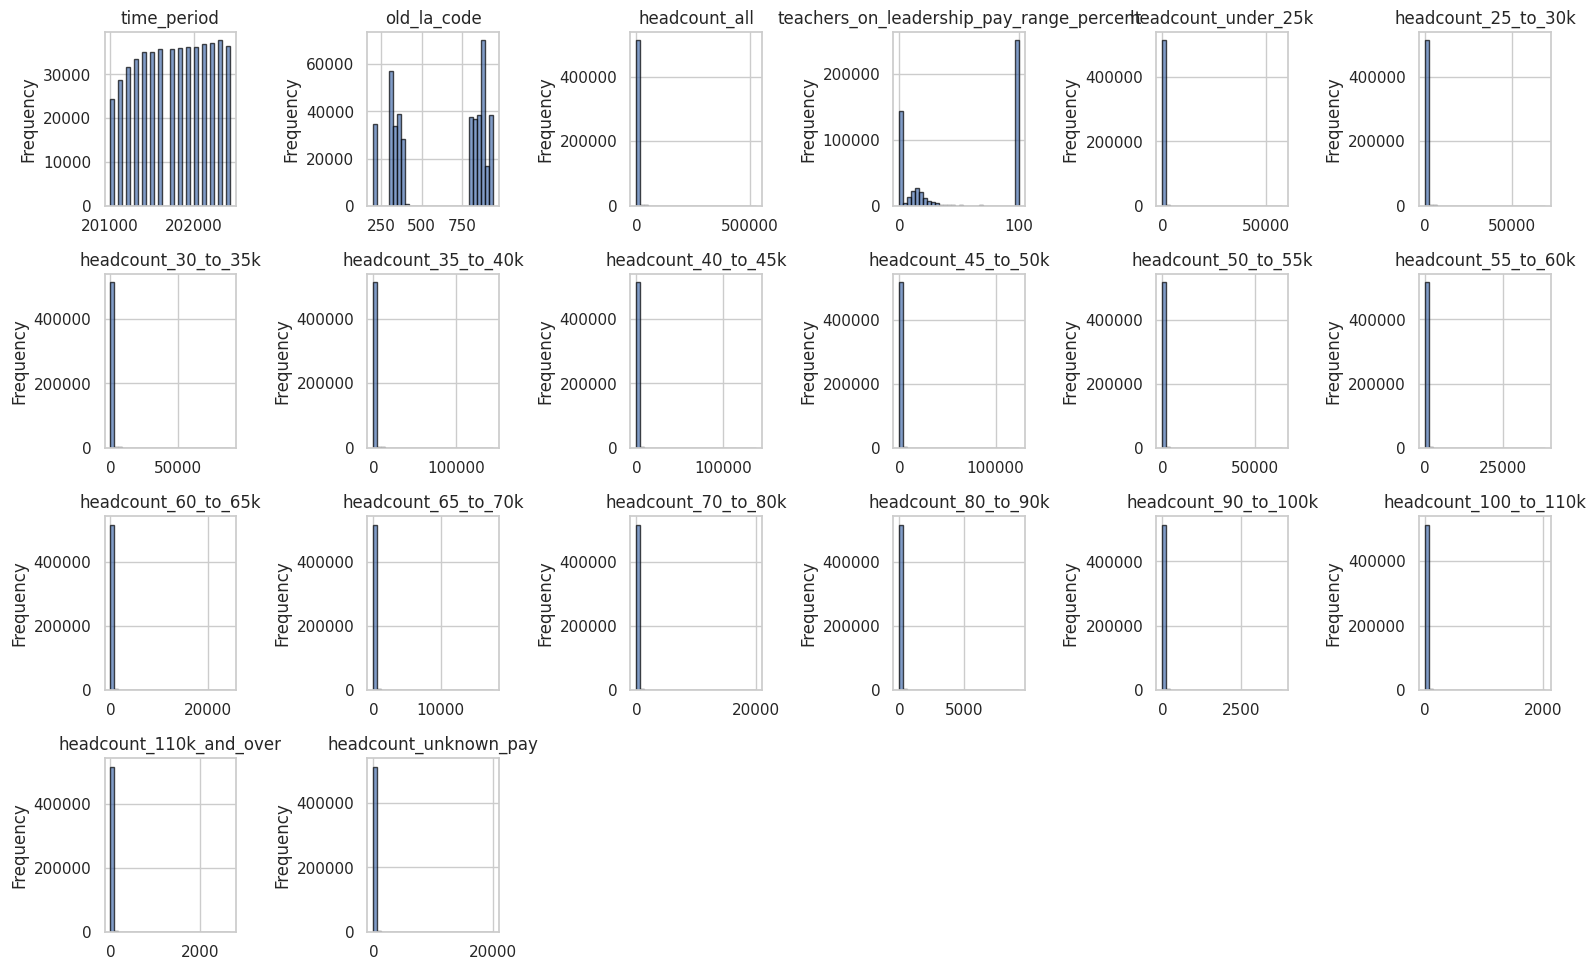

In [ ]:
# Check for missing values in each column
df_teachers.isnull().sum()

# Count unique values for each column
df_teachers.nunique()

# Example: Get the frequency of each value in the 'geographic_level' column
print(df_teachers['geographic_level'].value_counts())

# Calculate the correlation matrix for numeric columns
correlation_matrix = df_teachers.corr(numeric_only=True)
print(correlation_matrix)

# Boxplot for a specific numeric column, e.g., 'average_mean'
## Improved Histograms for Numeric Columns

import matplotlib.pyplot as plt

# Select numeric columns for plotting
numeric_cols = df_teachers.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot size and layout
plt.figure(figsize=(16, 12))

# Loop through numeric columns and plot histograms with adjusted bins and titles
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 6, i)  # Adjust subplot grid based on number of columns
    df_teachers[col].hist(bins=30, edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 2.4 Verify Data Quality

Number of outliers in 'average_mean': 18690


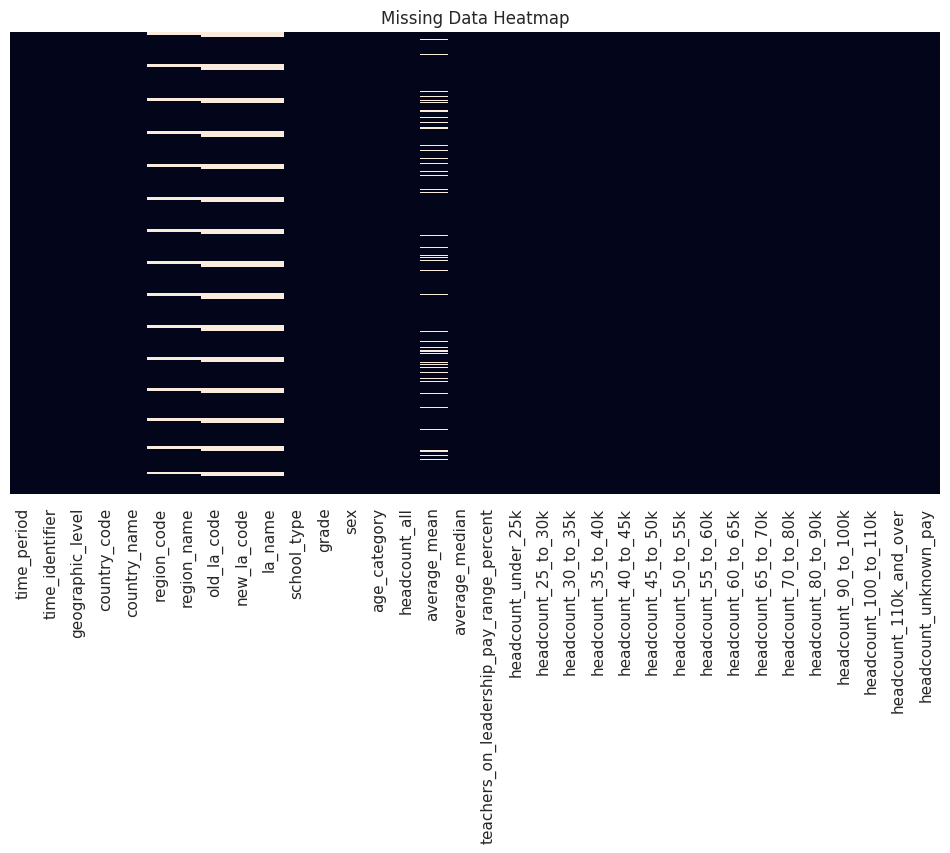

In [ ]:
# Ensure 'average_mean' is numeric, coercing errors to NaN
df_teachers['average_mean'] = pd.to_numeric(df_teachers['average_mean'], errors='coerce')

# Detect outliers using the IQR method for 'average_mean' salary (after conversion)
Q1 = df_teachers['average_mean'].quantile(0.25)
Q3 = df_teachers['average_mean'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_teachers[(df_teachers['average_mean'] < Q1 - 1.5 * IQR) | (df_teachers['average_mean'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers in 'average_mean': {len(outliers)}")

# Visualize missing data as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df_teachers.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()


##3.Data Preparation


###3.1 Select Data

In [ ]:
# Load the original Teachers dataset from the specified file path
teachers_df = pd.read_csv('/content/drive/MyDrive/Final Project 2025/Teachers_dataset.csv')

# Display the shape and first rows for initial inspection
print("Teachers dataset shape:", teachers_df.shape)
display(teachers_df.head())


Teachers dataset shape: (517449, 34)


,time_period,time_identifier,geographic_level,country_code,country_name,region_code,region_name,old_la_code,new_la_code,la_name,...,headcount_50_to_55k,headcount_55_to_60k,headcount_60_to_65k,headcount_65_to_70k,headcount_70_to_80k,headcount_80_to_90k,headcount_90_to_100k,headcount_100_to_110k,headcount_110k_and_over,headcount_unknown_pay
0,202425,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,...,64466,38308,24577,17786,19971,9289,3818,2034,2670,15951
1,202425,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,...,23465,12422,8824,6598,8301,4546,1628,645,597,9080
2,202425,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,...,12596,7115,5243,3866,4749,2525,893,357,283,5038
3,202425,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,...,146,121,81,77,114,48,19,4,11,102
4,202425,Academic year,National,E92000001,England,NaN,NaN,NaN,NaN,NaN,...,12450,6994,5162,3789,4635,2477,874,353,272,4936


### 3.2 Clean Data - Handle missing values and convert data types

In [ ]:
# Check for missing values in all relevant columns
missing_values = teachers_df[['school_type', 'grade', 'sex', 'age_category', 'region_name', 'average_median']].isnull().sum()
print("Missing values per column:\n", missing_values)

# Convert 'average_median' column to numeric for further analysis
teachers_df['average_median'] = pd.to_numeric(teachers_df['average_median'], errors='coerce')


Missing values per column:
 school_type           0
grade                 0
sex                   0
age_category          0
region_name       47681
average_median        0
dtype: int64


### 3.3 Select Relevant Columns

In [ ]:
# Select only the columns needed for further processing
teachers_selected = teachers_df[['time_period', 'region_name', 'school_type', 'grade', 'sex', 'age_category', 'average_median']].copy()

# Display the first rows of the reduced DataFrame
display(teachers_selected.head())

,time_period,region_name,school_type,grade,sex,age_category,average_median
0,202425,NaN,Total state-funded schools,Total,Total,Total,47185.0
1,202425,NaN,State-funded nursery and primary,Total,Total,Total,45646.0
2,202425,NaN,LA maintained nursery and primary,Total,Total,Total,45805.0
3,202425,NaN,LA maintained nursery,Total,Total,Total,50344.0
4,202425,NaN,LA maintained primary,Total,Total,Total,45722.0


### 3.5 Format and Aggregate Data - Group by time_period and region_name

In [ ]:
# Filter for classroom teachers in all state-funded schools, total by sex and age
teachers_agg = teachers_selected[
    (teachers_selected['school_type'] == 'Total state-funded schools') &
    (teachers_selected['grade'] == 'Classroom teachers') &
    (teachers_selected['sex'] == 'Total') &
    (teachers_selected['age_category'] == 'Total') &
    (teachers_selected['region_name'].isin(['Inner London', 'Outer London']))
].copy()

# Convert time_period to actual year (e.g., 202425 -> 2025)
teachers_agg['Year'] = teachers_agg['time_period'].astype(str).str[-2:].astype(int) + 2000

# Display the first rows for verification
display(teachers_agg[['Year', 'region_name', 'average_median']].head())

# Remove rows where average_median is NaN
teachers_agg = teachers_agg[teachers_agg['average_median'].notna()]


# If still multiple rows per (Year, region_name), aggregate (e.g., by mean or median)
teachers_final = teachers_agg.groupby(['Year', 'region_name'], as_index=False)['average_median'].mean()

# Display the cleaned result
display(teachers_final)



,Year,region_name,average_median
5076,2025,Inner London,50539.0
5324,2025,Outer London,49241.0
29948,2025,Inner London,NaN
30027,2025,Inner London,52526.0
30213,2025,Inner London,49320.0


,Year,region_name,average_median
0,2011,Inner London,38700.214286
1,2011,Outer London,37943.540000
2,2012,Inner London,38586.435714
3,2012,Outer London,37960.185000
4,2013,Inner London,37754.328571
5,2013,Outer London,37542.610000
6,2014,Inner London,37367.314286
7,2014,Outer London,37378.885000
8,2015,Inner London,37759.085714
9,2015,Outer London,37295.840000


In [ ]:
teachers_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            30 non-null     int64  
 1   region_name     30 non-null     object 
 2   average_median  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


### 3.6 Save Cleaned Teachers Earnings Data (Classroom Teachers, Inner & Outer London)

In [ ]:
# Save the cleaned dataset to Google Drive for use in further analysis
teachers_agg.to_csv('/content/drive/MyDrive/Final Project 2025/teachers_classroom_median_cleaned.csv', index=False)
print("Cleaned teachers dataset saved to Google Drive.")


Cleaned teachers dataset saved to Google Drive.


## 4 Visualizations

### 4.1 Annual Median Salary of Classroom Teachers in Inner and Outer London (2011–2025)

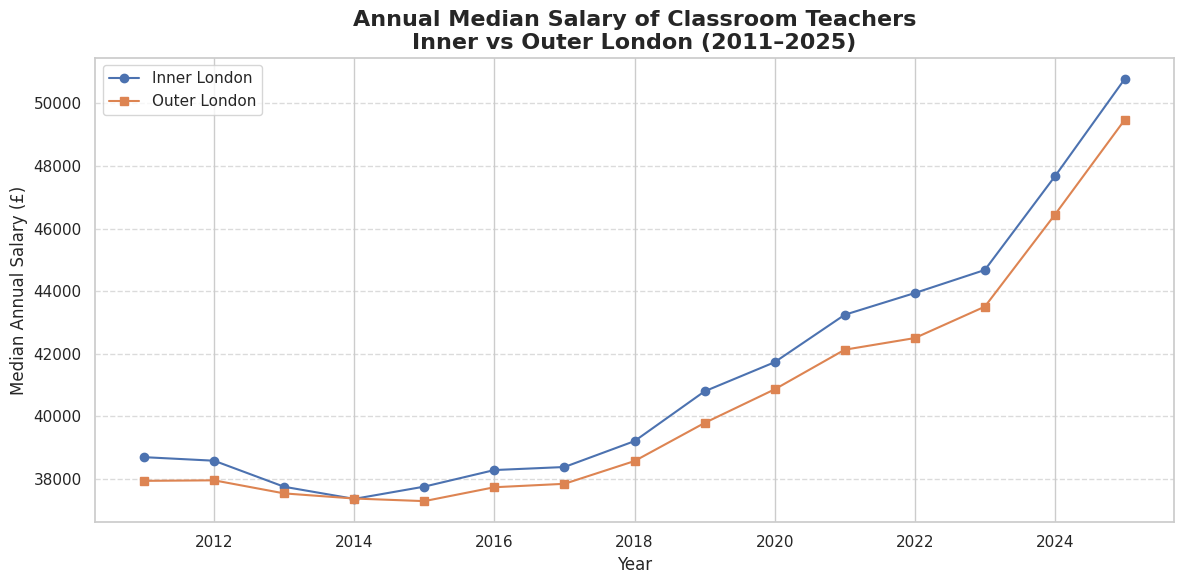

In [ ]:
import matplotlib.pyplot as plt

# Pivot for plotting if not already
pivot_teachers = teachers_final.pivot(index='Year', columns='region_name', values='average_median')

plt.figure(figsize=(12, 6))
plt.plot(pivot_teachers.index, pivot_teachers['Inner London'], marker='o', label='Inner London')
plt.plot(pivot_teachers.index, pivot_teachers['Outer London'], marker='s', label='Outer London')

plt.title('Annual Median Salary of Classroom Teachers\nInner vs Outer London (2011–2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Median Annual Salary (£)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4.2 Boxplot: Distribution of Median Salaries for Classroom Teachers in Inner vs Outer London (2010–2025)


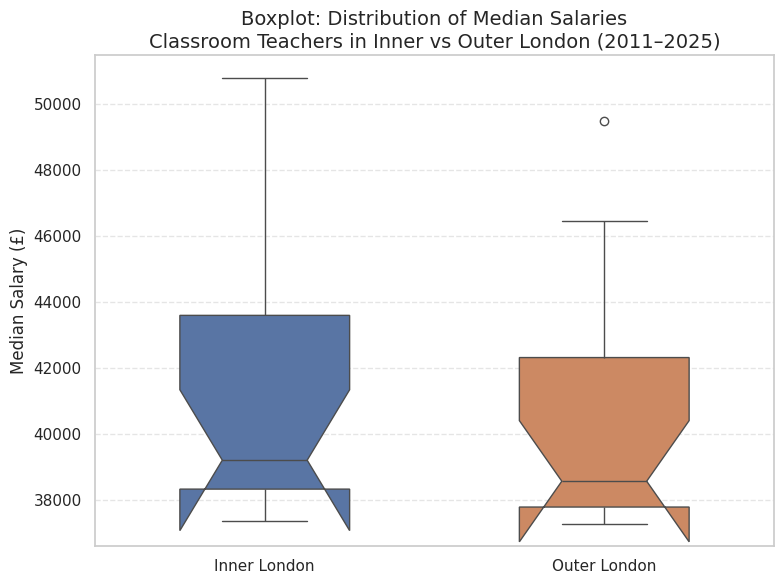

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=[pivot_teachers['Inner London'].dropna(), pivot_teachers['Outer London'].dropna()],
            notch=True, width=0.5)
plt.xticks([0, 1], ['Inner London', 'Outer London'])
plt.ylabel('Median Salary (£)')
plt.title('Boxplot: Distribution of Median Salaries\nClassroom Teachers in Inner vs Outer London (2011–2025)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 4.2 Year-on-Year Percentage Change in Median Salary (Inner and Outer London)


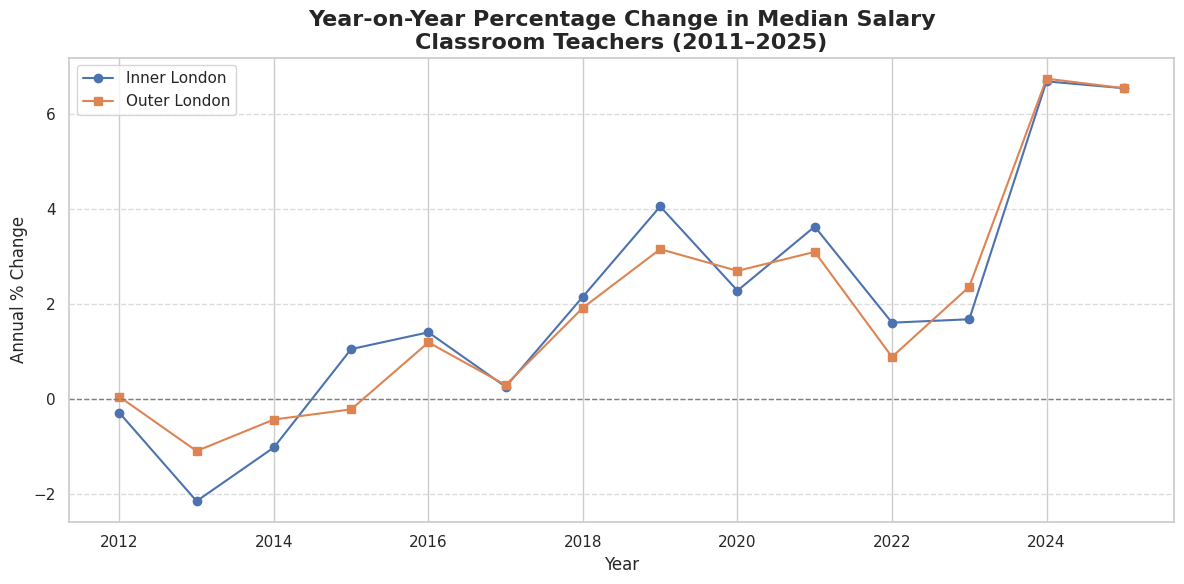

In [ ]:
# Calculate percentage change by region
pivot_teachers['Inner London YoY Change (%)'] = pivot_teachers['Inner London'].pct_change() * 100
pivot_teachers['Outer London YoY Change (%)'] = pivot_teachers['Outer London'].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(pivot_teachers.index, pivot_teachers['Inner London YoY Change (%)'], marker='o', label='Inner London')
plt.plot(pivot_teachers.index, pivot_teachers['Outer London YoY Change (%)'], marker='s', label='Outer London')

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Year-on-Year Percentage Change in Median Salary\nClassroom Teachers (2011–2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Annual % Change')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




# NHS STAFF DATASET

## 2.Data Understanind

###2.1 Collect initial data

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Final Project 2025/NHS Staff to March 2025.xlsx'

# Load 'Table 2b' with generic header, preview first rows
df_nhs_raw = pd.read_excel(file_path, sheet_name='Table 2b')
df_nhs_raw.head()
df_nhs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 179 entries, Table 2b: Mean Annual Earnings per person by Staff Group, in NHS Trusts and other core organisations in England [Notes 2 to 12, 14 to 19] to Unnamed: 178
dtypes: object(179)
memory usage: 42.1+ KB


### 2.2 Describe Data

In [ ]:
# Show shape and preview a few rows
print("Raw NHS dataset shape:", df_nhs_raw.shape)
print(df_nhs_raw.head(5))

# Print column names
print("Column names:")
print(list(df_nhs_raw.columns))

# Print data types
print("Data types:")
print(df_nhs_raw.dtypes)

Raw NHS dataset shape: (30, 179)
  Table 2b: Mean Annual Earnings per person by Staff Group, in NHS Trusts and other core organisations in England [Notes 2 to 12, 14 to 19]  \
0       Timeseries of each complete 12 month period                                                                                           
1  This worksheet contains one table which shows ...                                                                                          
2                                   Main Staff Group                                                                                          
3                                   All staff groups                                                                                          
4            Professionally qualified clinical staff                                                                                          

         Unnamed: 1                          Unnamed: 2  \
0               NaN                              

### 2.3 Explore Data


In [ ]:
# Check unique values in first two columns (they define staff groups)
print("Unique values in first column (main staff group):")
print(df_nhs_raw.iloc[:,0].unique())

print("\nUnique values in second column (staff group 1):")
print(df_nhs_raw.iloc[:,1].unique())

# Check for missing values across columns
print("\nMissing values per column (first 10 columns):")
print(df_nhs_raw.isnull().sum().head(10))

# Show summary statistics for all columns with numeric data
print("\nSummary statistics (describe):")
print(df_nhs_raw.describe())

Unique values in first column (main staff group):
['Timeseries of each complete 12 month period '
 'This worksheet contains one table which shows a time series of mean annual Earnings by staff group.'
 'Main Staff Group' 'All staff groups'
 'Professionally qualified clinical staff' 'Support to clinical staff'
 'NHS infrastructure support' 'Unknown classification']

Unique values in second column (staff group 1):
[nan 'Staff Group 1' 'All staff groups' 'HCHS doctors - All grades'
 'HCHS doctors - Consultant' 'HCHS doctors - Associate Specialist'
 'HCHS doctors - Specialty Doctor' 'HCHS doctors - Staff Grade'
 'HCHS doctors - Specialty Registrar' 'HCHS doctors - Core Training'
 'HCHS doctors - Foundation Doctor Year 2'
 'HCHS doctors - Foundation Doctor Year 1'
 'HCHS doctors - Hospital Practitioner / Clinical Assistant'
 'HCHS doctors - Other HCHS doctor grades' 'Nurses & health visitors'
 'Midwives' 'Ambulance staff' 'Scientific, therapeutic & technical staff'
 'Support to doctors, nur

### 2.4 Verify Data Quality


Number of duplicate rows: 0


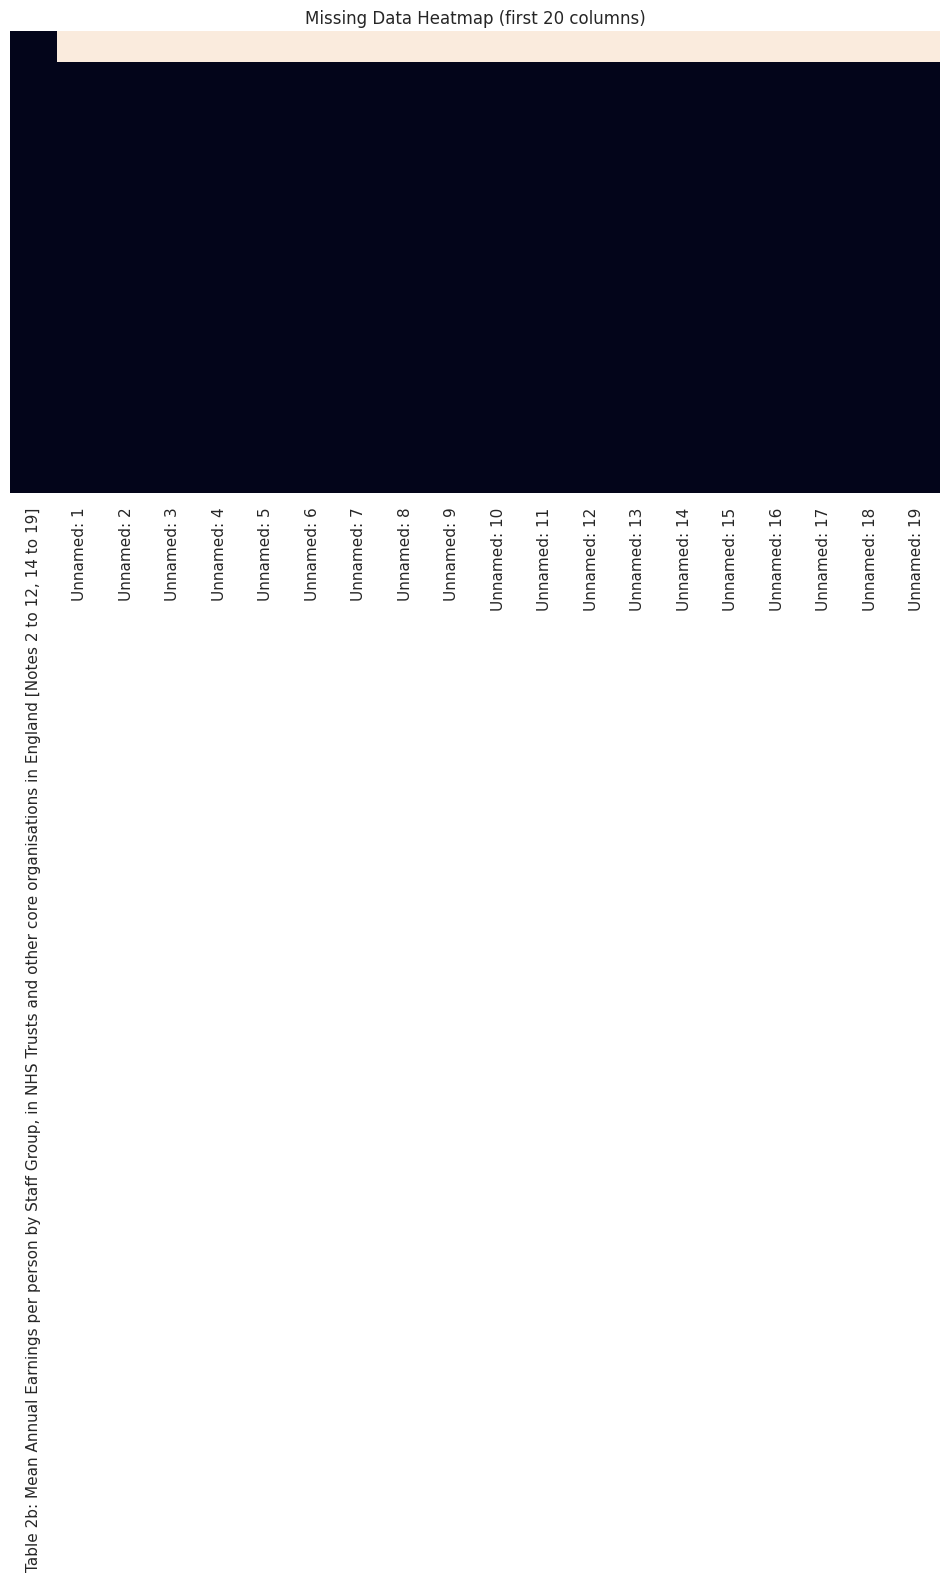

In [ ]:
# Check for duplicate rows
duplicates = df_nhs_raw.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Visualize missing data as a heatmap (first 20 columns for readability)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df_nhs_raw.iloc[:,:20].isnull(), cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap (first 20 columns)')
plt.show()

##3.Data Preparation

###  3.1 Select Data: Nurses & Health Visitors (NHS Staff Earnings Table 2b)

In [ ]:
# Load the raw NHS Staff Salary dataset from the specified sheet, including all columns and rows.
import pandas as pd

df_raw = pd.read_excel('/content/drive/MyDrive/Final Project 2025/NHS Staff to March 2025.xlsx', sheet_name='Table 2b', header=None)

# Display the first 15 rows to analyse the structure and locate the correct header and staff group row.
df_raw.head(15)


,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,Table 2b: Mean Annual Earnings per person by S...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Timeseries of each complete 12 month period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,This worksheet contains one table which shows ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Main Staff Group,Staff Group 1,12 month period ending August 2010,12 month period ending September 2010,12 month period ending October 2010,12 month period ending November 2010,12 month period ending December 2010,12 month period ending January 2011,12 month period ending February 2011,12 month period ending March 2011,...,12 month period ending July 2024,12 month period ending August 2024,12 month period ending September 2024,12 month period ending October 2024,12 month period ending November 2024,12 month period ending December 2024,12 month period ending January 2025,12 month period ending February 2025,12 month period ending March 2025,% change between the 12 month period March 202...
4,All staff groups,All staff groups,29134.22,29184.67,29242.14,29300.57,29353.62,29424.7,29492.27,29570.65,...,39972.69,40027.56,39868.15,41004.41,41466.25,41703.05,41930.49,42137.44,42298.99,0.027825
5,Professionally qualified clinical staff,All staff groups,37705.93,37749.47,37794.38,37846.35,37879.36,37935.15,37985.06,38031.69,...,50575.95,50658.55,50303.71,51656.3,52343.99,52616.1,52882.94,53108.09,53257.1,0.032451
6,Professionally qualified clinical staff,HCHS doctors - All grades,73114.95,73102.25,73096.85,73065.69,73046.86,73045.99,73000.83,72960.59,...,95959.7,96418.25,94561.3,96546.93,99111.75,99672.68,100270.84,100620.05,100593.11,0.076818
7,Professionally qualified clinical staff,HCHS doctors - Consultant,111694.95,111530.33,111387.69,111198.83,110993.73,110867.55,110711.95,110525.79,...,140817.39,141561.81,138981.56,143435.85,144456.07,145132.8,145744.04,145841.04,144979.9,0.060706
8,Professionally qualified clinical staff,HCHS doctors - Associate Specialist,78700.43,78915.35,79062.38,79020.69,78889.63,78963.91,78945.83,78904.48,...,108961.39,110336.6,108383.57,111546.29,112155.87,112655.87,113133.68,113312.45,113603.89,0.050962
9,Professionally qualified clinical staff,HCHS doctors - Specialty Doctor,57049.37,57196.34,57353.5,57229.08,57205.33,57321.55,57307.46,57244.37,...,82136.43,83392.07,81951.36,84294.33,84915.01,85423.66,85780.35,85971.96,86161.95,0.052657


### 3.2 Clean Data: Select Only March Periods (2010–2025)

In [ ]:
# Find column indices for the required periods in the header row
header_row = 3
row_nurses = df_raw[df_raw[1] == "Nurses & health visitors"].index[0]

# Find index for August 2010
idx_aug_2010 = list(df_raw.iloc[header_row]).index('12 month period ending August 2010')

# Find indices for all March periods from 2011 to 2025
march_periods = [f'12 month period ending March {year}' for year in range(2011, 2026)]
idxs_march = [list(df_raw.iloc[header_row]).index(mp) for mp in march_periods]

# Extract earnings for each period
values_2010 = df_raw.iloc[row_nurses, idx_aug_2010]
values_march = [df_raw.iloc[row_nurses, idx] for idx in idxs_march]

# Build lists of years and corresponding values
years_final = [2010] + list(range(2011, 2026))
earnings_final = [float(values_2010)] + [float(v) for v in values_march]

# Build the DataFrame
df_nurses_selected = pd.DataFrame({
    'Year': years_final,
    'Mean Annual Earnings (£)': earnings_final
})

# Display the resulting DataFrame
df_nurses_selected


,Year,Mean Annual Earnings (£)
0,2010,29599.04
1,2011,30043.63
2,2012,30347.15
3,2013,30594.27
4,2014,30830.39
5,2015,30989.40
6,2016,31112.65
7,2017,31341.32
8,2018,31683.49
9,2019,32478.29


### 3.3 Select Relevant Columns and Format Years

In [ ]:
# Ensure only the relevant columns are included and data types are correct.
# This step guarantees that the dataset is properly structured for time series analysis.

# Select only the required columns
df_nurses_selected = df_nurses_selected[['Year', 'Mean Annual Earnings (£)']]

# Ensure 'Year' is integer and 'Mean Annual Earnings (£)' is float
df_nurses_selected['Year'] = df_nurses_selected['Year'].astype(int)
df_nurses_selected['Mean Annual Earnings (£)'] = df_nurses_selected['Mean Annual Earnings (£)'].astype(float)

# Display the first rows for verification
df_nurses_selected.head()

,Year,Mean Annual Earnings (£)
0,2010,29599.04
1,2011,30043.63
2,2012,30347.15
3,2013,30594.27
4,2014,30830.39


### 3.4 Data Quality Check: Missing or Outlier Values

In [ ]:
# Check for missing values and identify any potential outliers using the IQR method.
# This step is essential to ensure the reliability of subsequent analyses.

# Check for missing values in each column
missing_values = df_nurses_selected.isnull().sum()

# Calculate basic descriptive statistics to identify possible outliers
desc_stats = df_nurses_selected['Mean Annual Earnings (£)'].describe()

# Identify outliers using the Interquartile Range (IQR) method
Q1 = df_nurses_selected['Mean Annual Earnings (£)'].quantile(0.25)
Q3 = df_nurses_selected['Mean Annual Earnings (£)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_nurses_selected[
    (df_nurses_selected['Mean Annual Earnings (£)'] < Q1 - 1.5 * IQR) |
    (df_nurses_selected['Mean Annual Earnings (£)'] > Q3 + 1.5 * IQR)
]

# Display missing values, basic statistics, and any detected outliers
missing_values, desc_stats, outliers


(Year                        0
 Mean Annual Earnings (£)    0
 dtype: int64,
 count       16.000000
 mean     33262.813125
 std       3682.506746
 min      29599.040000
 25%      30771.360000
 50%      31512.405000
 75%      35000.562500
 max      41054.980000
 Name: Mean Annual Earnings (£), dtype: float64,
 Empty DataFrame
 Columns: [Year, Mean Annual Earnings (£)]
 Index: [])

In [ ]:
df_nurses_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      16 non-null     int64  
 1   Mean Annual Earnings (£)  16 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 388.0 bytes


### 3.6 Save Cleaned NHS Nurses Earnings Data

In [ ]:
# Save the cleaned annual earnings dataset to an Excel file in your Google Drive.
# This ensures reproducibility and facilitates further analysis or integration with other datasets.

output_path = '/content/drive/MyDrive/Final Project 2025/nhs_nurses_cleaned_2010_2025.xlsx'
df_nurses_selected.to_excel(output_path, index=False)

print(f"Cleaned data saved to: {output_path}")


Cleaned data saved to: /content/drive/MyDrive/Final Project 2025/nhs_nurses_cleaned_2010_2025.xlsx


##4. Visualizations

###4.1 Annual Mean Earnings for NHS Nurses & Health Visitors in England (2011–2025)

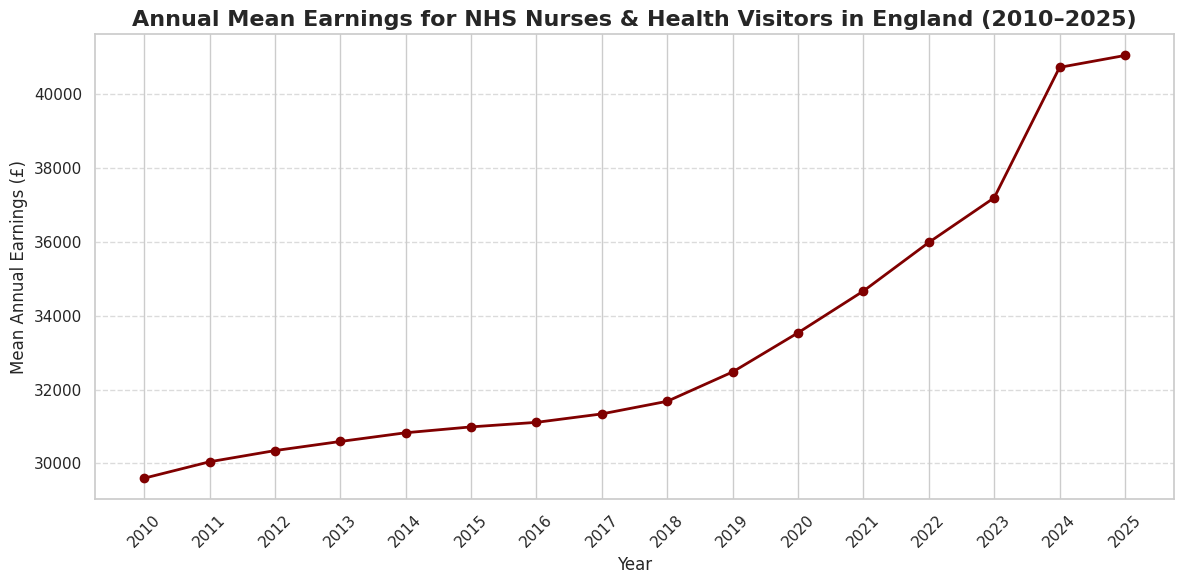

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned nurses earnings data (Excel file)
nurses_df = pd.read_excel('/content/drive/MyDrive/Final Project 2025/nhs_nurses_cleaned_2010_2025.xlsx')

# Plot the annual mean earnings over time
plt.figure(figsize=(12, 6))
plt.plot(nurses_df['Year'], nurses_df['Mean Annual Earnings (£)'], marker='o', linewidth=2, color='maroon')

plt.title('Annual Mean Earnings for NHS Nurses & Health Visitors in England (2010–2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Mean Annual Earnings (£)')
plt.xticks(nurses_df['Year'], rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4.2 Annual Percentage Change in Mean Earnings for NHS Nurses & Health Visitors (2010–2025)


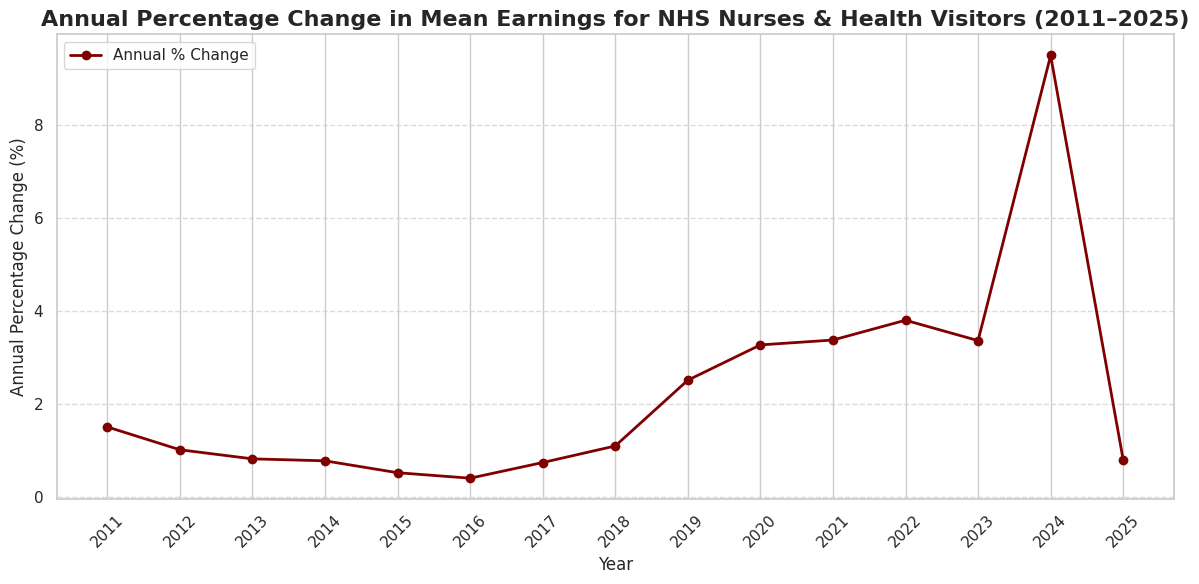

In [ ]:
# Calculate the annual percentage change in mean earnings.
nurses_df['Annual % Change'] = nurses_df['Mean Annual Earnings (£)'].pct_change() * 100

plt.figure(figsize=(12, 6))

# Plot only the valid percentage changes (the first year will be NaN)
plt.plot(
    nurses_df['Year'][1:],
    nurses_df['Annual % Change'][1:],
    marker='o', color='maroon', linewidth=2,
    label='Annual % Change'
)

plt.title('Annual Percentage Change in Mean Earnings for NHS Nurses & Health Visitors (2011–2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Annual Percentage Change (%)')
plt.xticks(nurses_df['Year'][1:], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


# TFL DRIVERS DATASET

##2.Data Understanding

### 2.1 Collect Initial Data: Inspect TfL Salaries Excel File

In [ ]:
import pandas as pd

# Load the relevant sheet containing operational spot salaries
tfl_df = pd.read_excel(
    '/content/drive/MyDrive/Final Project 2025/TFL_Salaries.xlsx',
    sheet_name='Spot Salaries (Operational)'
)

# Display the first 10 rows to understand the raw structure
tfl_df.head(10)
tfl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job Name          470 non-null    object
 1   Grade             473 non-null    object
 2   Job Role          473 non-null    object
 3   Grade Equivalent  473 non-null    object
 4   Spot Salary       473 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 18.6+ KB


### 2.2 Describe Data


In [ ]:
# Show information about columns, datatypes, and number of entries
tfl_df.info()

# Show column names
print(tfl_df.columns)

# Display first rows again for context
tfl_df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job Name          470 non-null    object
 1   Grade             473 non-null    object
 2   Job Role          473 non-null    object
 3   Grade Equivalent  473 non-null    object
 4   Spot Salary       473 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 18.6+ KB
Index(['Job Name', 'Grade', 'Job Role', 'Grade Equivalent', 'Spot Salary'], dtype='object')


,Job Name,Grade,Job Role,Grade Equivalent,Spot Salary
0,Advanced Train Maintainer,AT32,ATM (3 Shift),Operational,60828
1,Advanced Train Maintainer,TL_AT22,"ATM (3 Shift), Piccadilly Line",Operational,61383
2,Advanced Train Maintainer,TL_AT23,ATM (3 Shift) Transplant,Operational,61383
3,Advanced Train Maintainer,AT25,ATM (3 Shift),Operational,60828
4,Advanced Train Maintainer,AT18,ATM (2 Shift),Operational,57509


### 2.3 Explore TfL Bus Driver Data: Missing Values, Duplicates, Uniques, and Outliers


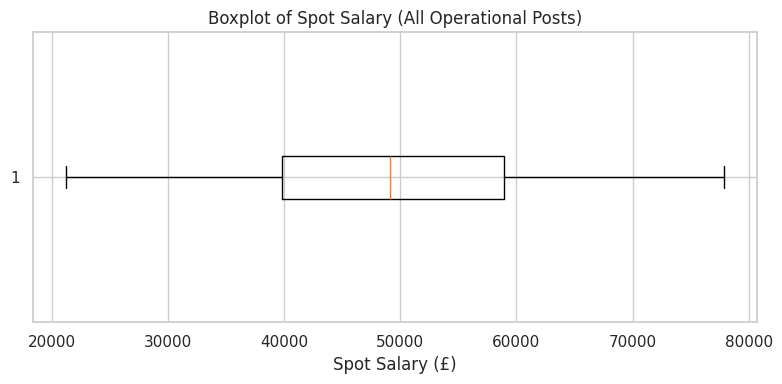

(Job Name            3
 Grade               0
 Job Role            0
 Grade Equivalent    0
 Spot Salary         0
 dtype: int64,
 np.int64(57),
 array(['AT32', 'TL_AT22', 'TL_AT23', 'AT25', 'AT18', 'AT23', 'AT28',
        'AT14', 'AT11', 'AT26', 'AT12', 'AT16', 'AT30', 'TM56', 'ET04',
        'ET01', 'ET03', 'ET02', 'WF_AE1', 'LE55', 'LE58', 'LE57', 'LE56',
        'SE40', 'XA11', 'EM11', 'BSC', 'SE15', 'UL02', 'UL01', 'AT34',
        'TL_AT24', 'AT37', 'WF_CA2', 'WF_CA3', 'WF_CP2', 'WF_CP3', 'CJ13',
        'CJ11', 'CJ12', 'TW01', 'SE89', 'TL_TC12', 'TC12', 'TL_MH18',
        'TC51', 'CH14', 'CH11', 'CH12', 'CH19', 'TC14', 'CH13', 'TL_TC59',
        'TL_LE34', 'CM14', 'CM12', 'OPOF', 'CRT1', 'TL_CRT1', 'CSA1',
        'CSA2', 'CSS1', 'CSS2', '4VR9', 'WF_DE2', 'WF_DE3', 'DT02', 'DT04',
        'TL_DTP1', 'DTP1', 'DT05', 'DTM1', 'DT06', 'DT03', 'DT01', 'GH15',
        'DVRS5', 'DVRS0', 'DVRS2', 'DVRS4', 'DVR25', 'DVR20', 'EC11',
        'EM12', 'WE11', 'SE54', 'SE14', 'WF_EL2', 'WF_ET1

In [ ]:
# Check for missing values in each column
missing_values = tfl_df.isnull().sum()

# Check for duplicated rows in the dataset
duplicated_rows = tfl_df.duplicated().sum()

# Display unique Grade codes and Job Names
unique_grades = tfl_df['Grade'].unique()
unique_job_names = tfl_df['Job Name'].unique()

# Basic descriptive statistics for Spot Salary
salary_stats = tfl_df['Spot Salary'].describe()

# Boxplot for Spot Salary to visually detect outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.boxplot(tfl_df['Spot Salary'], vert=False)
plt.title('Boxplot of Spot Salary (All Operational Posts)')
plt.xlabel('Spot Salary (£)')
plt.tight_layout()
plt.show()

# Display results for review
missing_values, duplicated_rows, unique_grades, unique_job_names[:15], salary_stats


### 2.4 Verify Data Quality: Duplicates, Outliers, and Grade Consistency


In [ ]:
# Check for duplicated rows and display them for manual inspection
duplicated_count = tfl_df.duplicated().sum()
duplicated_rows = tfl_df[tfl_df.duplicated()]

# Identify unique grades and check consistency for bus/train driver codes
driver_grade_codes = ['DVRS0', 'DVRS2', 'DVRS4', 'DVR25', 'DVR20']
grade_consistency = all(code in tfl_df['Grade'].unique() for code in driver_grade_codes)

# Detect outliers in 'Spot Salary' using the IQR method
Q1 = tfl_df['Spot Salary'].quantile(0.25)
Q3 = tfl_df['Spot Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = tfl_df[(tfl_df['Spot Salary'] < Q1 - 1.5 * IQR) | (tfl_df['Spot Salary'] > Q3 + 1.5 * IQR)]

# Display results
print(f"Number of duplicated rows: {duplicated_count}")
print(f"Are all driver grade codes present? {grade_consistency}")
print(f"Number of outliers detected in Spot Salary: {outliers.shape[0]}")
duplicated_rows.head(), outliers[['Job Name', 'Grade', 'Spot Salary']].head()


Number of duplicated rows: 57
Are all driver grade codes present? True
Number of outliers detected in Spot Salary: 0


(             Job Name Grade                                          Job Role  \
 387  HV Cable Jointer  PLB4  Tester / Electrical Fitter / Jointer / Craftsman   
 390      Shift Tester  P3R2          Craftsperson L2 Roll Shift - Experienced   
 391     Band 4 Fitter  PLB4  Tester / Electrical Fitter / Jointer / Craftsman   
 392     Band 4 Fitter  PLB4  Tester / Electrical Fitter / Jointer / Craftsman   
 393      Shift Tester  P3R2          Craftsperson L2 Roll Shift - Experienced   
 
     Grade Equivalent  Spot Salary  
 387      Operational        41577  
 390      Operational        61361  
 391      Operational        41577  
 392      Operational        41577  
 393      Operational        61361  ,
 Empty DataFrame
 Columns: [Job Name, Grade, Spot Salary]
 Index: [])

##3.Data Preparation

### 3.1 Remove Duplicates and Filter for Bus Driver Grades


In [ ]:
# Filter for all records with Job Role equal to 'Driver Attendant'
# Remove duplicates from the original tfl_df
tfl_df_nodup = tfl_df.drop_duplicates()
# Filter for all records with Job Role equal to 'Driver Attendant'
bus_driver_df = tfl_df_nodup[tfl_df_nodup['Job Role'].str.strip().str.lower() == 'driver attendant']


# Display unique grades and spot salaries for verification
bus_driver_df = bus_driver_df.sort_values('Spot Salary').reset_index(drop=True)
bus_driver_df['Grade (A–F)'] = [chr(65 + i) for i in range(len(bus_driver_df))]
bus_driver_df[['Job Name', 'Grade', 'Grade (A–F)', 'Spot Salary']]


,Job Name,Grade,Grade (A–F),Spot Salary
0,Driver - DAR,DVR20,A,27660
1,Driver - DAR,DVRS0,B,28531
2,Trainee Customer Service Assistant,DVRS0,C,28531
3,Driver - DAR,DVRS2,D,31049
4,Driver - DAR,DVRS4,E,33560
5,Driver - DAR,DVR25,F,33738
6,Driver - DAR,DVRS5,G,34817


### 3.2 Data Quality Check: Bus Driver Salaries (2024/25)


In [ ]:
# Check for missing values in the filtered DataFrame
missing = bus_driver_df.isnull().sum()

# Check for duplicated rows (should be zero after filtering)
dupes = bus_driver_df.duplicated().sum()

# Basic statistics for the five salary values
salary_stats = bus_driver_df['Spot Salary'].describe()

# Display the results
missing, dupes, salary_stats


(Job Name            0
 Grade               0
 Job Role            0
 Grade Equivalent    0
 Spot Salary         0
 Grade (A–F)         0
 dtype: int64,
 np.int64(0),
 count        7.000000
 mean     31126.571429
 std       2939.884173
 min      27660.000000
 25%      28531.000000
 50%      31049.000000
 75%      33649.000000
 max      34817.000000
 Name: Spot Salary, dtype: float64)

### 3.3 Add Readable Grade Labels for Bus Driver Salary Bands


In [ ]:
# Ensure only 'Driver - DAR' roles are included for clarity
bus_driver_df = bus_driver_df[bus_driver_df['Job Name'].str.strip() == 'Driver - DAR'].copy()

# Sort by salary in ascending order and assign letter labels (A, B, C, ...)
bus_driver_df = bus_driver_df.sort_values('Spot Salary').reset_index(drop=True)
bus_driver_df['Grade (A–G)'] = [chr(65 + i) for i in range(len(bus_driver_df))]

# Display the final DataFrame with letter grade labels
bus_driver_df[['Job Name', 'Grade', 'Grade (A–G)', 'Spot Salary']]


,Job Name,Grade,Grade (A–G),Spot Salary
0,Driver - DAR,DVR20,A,27660
1,Driver - DAR,DVRS0,B,28531
2,Driver - DAR,DVRS2,C,31049
3,Driver - DAR,DVRS4,D,33560
4,Driver - DAR,DVR25,E,33738
5,Driver - DAR,DVRS5,F,34817


### 3.4 Save Cleaned Bus Driver Salary Bands (2024/25)


In [ ]:
bus_driver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job Name          6 non-null      object
 1   Grade             6 non-null      object
 2   Job Role          6 non-null      object
 3   Grade Equivalent  6 non-null      object
 4   Spot Salary       6 non-null      int64 
 5   Grade (A–F)       6 non-null      object
 6   Grade (A–G)       6 non-null      object
dtypes: int64(1), object(6)
memory usage: 468.0+ bytes


In [ ]:
# Save the cleaned bus driver salary data with readable grade labels to Excel for future analysis and reporting.
output_path = '/content/drive/MyDrive/Final Project 2025/tfl_bus_drivers_cleaned_2024_2025.xlsx'
bus_driver_df.to_excel(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")


Cleaned data saved to: /content/drive/MyDrive/Final Project 2025/tfl_bus_drivers_cleaned_2024_2025.xlsx


## 4.Visualization

### 4.1 Bar Chart of Bus Driver Salaries by Grade (2024/25)


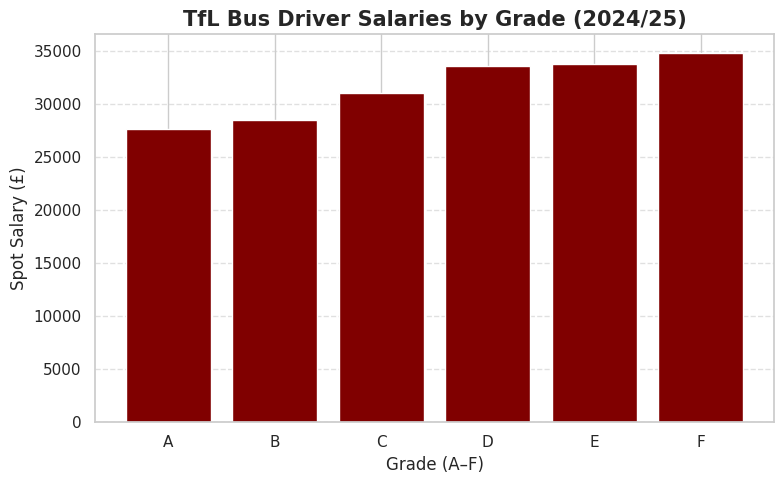

In [ ]:
import matplotlib.pyplot as plt

# Bar chart of spot salary by grade label (A–F)
plt.figure(figsize=(8, 5))
plt.bar(bus_driver_df['Grade (A–G)'], bus_driver_df['Spot Salary'], color='maroon')

plt.title('TfL Bus Driver Salaries by Grade (2024/25)', fontsize=15, fontweight='bold')
plt.xlabel('Grade (A–F)')
plt.ylabel('Spot Salary (£)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 4.2 Boxplot of TfL Bus Driver Salaries (2024/25)

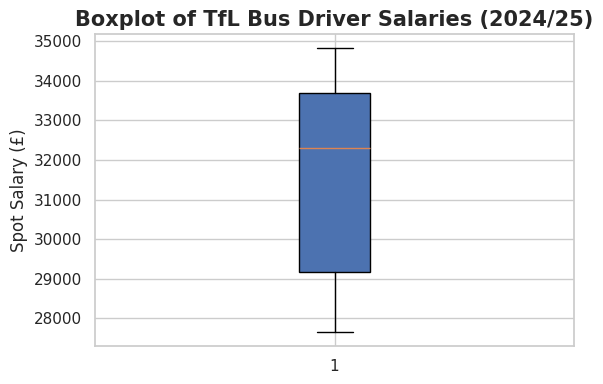

In [ ]:
# Boxplot to visualise salary dispersion for bus drivers
plt.figure(figsize=(6, 4))
plt.boxplot(bus_driver_df['Spot Salary'], vert=True, patch_artist=True)

plt.title('Boxplot of TfL Bus Driver Salaries (2024/25)', fontsize=15, fontweight='bold')
plt.ylabel('Spot Salary (£)')
plt.tight_layout()
plt.show()


# 4. Modelling

## 4.1 Load All Cleaned Datasets for Master Table Construction


In [ ]:
nhs_file = '/content/drive/MyDrive/Final Project 2025/nhs_nurses_cleaned_2010_2025.xlsx'
tfl_file = '/content/drive/MyDrive/Final Project 2025/tfl_bus_drivers_cleaned_2024_2025.xlsx'
teachers_file = '/content/drive/MyDrive/Final Project 2025/teachers_classroom_median_cleaned.csv'
house_file = '/content/drive/MyDrive/Final Project 2025/house_price_prepared.csv'


## 4.2 Build Master DataFrame for Cross-Sector Comparison (2010–2025)


In [ ]:
import pandas as pd

# Load cleaned datasets into DataFrames
nhs_df = pd.read_excel('/content/drive/MyDrive/Final Project 2025/nhs_nurses_cleaned_2010_2025.xlsx')
tfl_df = pd.read_excel('/content/drive/MyDrive/Final Project 2025/tfl_bus_drivers_cleaned_2024_2025.xlsx')
teachers_df = pd.read_csv('/content/drive/MyDrive/Final Project 2025/teachers_classroom_median_cleaned.csv')
house_df = pd.read_csv('/content/drive/MyDrive/Final Project 2025/house_price_prepared.csv')

# Display initial rows for verification
display(nhs_df.head())
display(tfl_df.head())
display(teachers_df.head())
display(house_df.head())


,Year,Mean Annual Earnings (£)
0,2010,29599.04
1,2011,30043.63
2,2012,30347.15
3,2013,30594.27
4,2014,30830.39


,Job Name,Grade,Job Role,Grade Equivalent,Spot Salary,Grade (A–F),Grade (A–G)
0,Driver - DAR,DVR20,Driver Attendant,Operational,27660,A,A
1,Driver - DAR,DVRS0,Driver Attendant,Operational,28531,B,B
2,Driver - DAR,DVRS2,Driver Attendant,Operational,31049,D,C
3,Driver - DAR,DVRS4,Driver Attendant,Operational,33560,E,D
4,Driver - DAR,DVR25,Driver Attendant,Operational,33738,F,E


,time_period,region_name,school_type,grade,sex,age_category,average_median,Year
0,202425,Inner London,Total state-funded schools,Classroom teachers,Total,Total,50539.0,2025
1,202425,Outer London,Total state-funded schools,Classroom teachers,Total,Total,49241.0,2025
2,202425,Inner London,Total state-funded schools,Classroom teachers,Total,Total,52526.0,2025
3,202425,Inner London,Total state-funded schools,Classroom teachers,Total,Total,49320.0,2025
4,202425,Inner London,Total state-funded schools,Classroom teachers,Total,Total,50288.0,2025


,Year,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Inner London,Outer London,LONDON,England
0,2010,448197.916667,171212.666667,353351.916667,200868.666667,312193.500000,275729.916667,508307.833333,221673.666667,313290.916667,...,339244.750000,236048.166667,310382.750000,229331.333333,429661.666667,644971.916667,373364.083333,266981.583333,304618.500000,167557.916667
1,2011,458342.250000,168030.750000,359556.750000,200666.750000,322330.166667,279621.500000,549085.416667,218416.916667,323434.916667,...,360744.000000,235580.416667,315337.750000,228095.500000,443099.500000,672415.583333,388124.000000,270457.333333,311050.500000,165440.666667
2,2012,518999.500000,170496.500000,380399.000000,202540.750000,338662.250000,286895.500000,580554.250000,224895.166667,340971.166667,...,382195.166667,241459.666667,313351.250000,238236.250000,469708.250000,740891.500000,410627.666667,279171.916667,325370.416667,167572.666667
3,2013,563142.333333,178586.000000,397522.250000,213464.416667,366201.250000,301792.333333,661057.666667,237693.083333,361717.583333,...,416390.166667,254764.500000,339255.750000,262541.083333,524793.916667,839807.833333,455234.416667,295697.500000,352391.666667,172381.500000
4,2014,700840.250000,206790.750000,456489.916667,244452.583333,425534.250000,353864.666667,749244.166667,278641.166667,427997.666667,...,493744.000000,294322.666667,419599.583333,325185.000000,624738.916667,980910.916667,539888.916667,343131.000000,413366.750000,186722.500000


## 4.3 Construct Master DataFrame: Align Key Worker Earnings and London House Prices (2010–2025)


In [ ]:
# Professional comments in English for report integration

# 1. Prepare a condensed version of each DataFrame for merging (only relevant columns)

# NHS nurses: Year and Mean Annual Earnings
nhs_sub = nhs_df[['Year', 'Mean Annual Earnings (£)']].rename(columns={'Mean Annual Earnings (£)': 'NHS Nurses (£)'})

# TfL Bus Drivers: select mean spot salary for 2025 (or most recent available year)
tfl_mean_salary = tfl_df['Spot Salary'].mean()
tfl_year = 2025  # Only available for most recent year
tfl_row = pd.DataFrame({'Year': [tfl_year], 'TfL Bus Drivers (£)': [tfl_mean_salary]})

# Teachers: Inner and Outer London median salary per year (classroom teachers, total schools)
teachers_pivot = teachers_df[
    (teachers_df['school_type'] == 'Total state-funded schools') &
    (teachers_df['grade'] == 'Classroom teachers') &
    (teachers_df['sex'] == 'Total') &
    (teachers_df['age_category'] == 'Total')
].groupby(['Year', 'region_name'], as_index=False)['average_median'].mean()

# Pivot to have Inner and Outer as separate columns
teachers_pivot = teachers_pivot.pivot(index='Year', columns='region_name', values='average_median').reset_index()
teachers_pivot.columns = ['Year', 'Teachers Inner London (£)', 'Teachers Outer London (£)']

# House Prices: use the 'LONDON' column for average, or Inner/Outer if needed
house_sub = house_df[['Year', 'LONDON', 'Inner London', 'Outer London']].rename(
    columns={
        'LONDON': 'London House Price (£)',
        'Inner London': 'Inner London House Price (£)',
        'Outer London': 'Outer London House Price (£)'
    }
)

# 2. Merge all datasets on Year (left join to include all available years)
master_df = pd.merge(nhs_sub, teachers_pivot, on='Year', how='outer')
master_df = pd.merge(master_df, house_sub, on='Year', how='outer')
master_df = pd.merge(master_df, tfl_row, on='Year', how='left')  # Only for 2025

# 3. Sort by Year for readability
master_df = master_df.sort_values('Year').reset_index(drop=True)

# 4. Display the resulting master DataFrame for verification
display(master_df.head(16))


,Year,NHS Nurses (£),Teachers Inner London (£),Teachers Outer London (£),London House Price (£),Inner London House Price (£),Outer London House Price (£),TfL Bus Drivers (£)
0,2010,29599.04,NaN,NaN,304618.500000,373364.083333,266981.583333,NaN
1,2011,30043.63,38700.214286,37943.540,311050.500000,388124.000000,270457.333333,NaN
2,2012,30347.15,38586.435714,37960.185,325370.416667,410627.666667,279171.916667,NaN
3,2013,30594.27,37754.328571,37542.610,352391.666667,455234.416667,295697.500000,NaN
4,2014,30830.39,37367.314286,37378.885,413366.750000,539888.916667,343131.000000,NaN
5,2015,30989.40,37759.085714,37295.840,455128.750000,585817.000000,382704.333333,NaN
6,2016,31112.65,38288.357143,37739.540,500486.750000,627387.000000,430840.833333,NaN
7,2017,31341.32,38385.435714,37849.045,514130.166667,642599.000000,445686.083333,NaN
8,2018,31683.49,39212.328571,38575.775,511558.083333,633338.000000,447127.416667,NaN
9,2019,32478.29,40802.407143,39792.805,504314.333333,623380.916667,440811.583333,NaN


## 4.4 Calculate House Price to Salary Ratios (Affordability Analysis)


In [ ]:
# This section calculates the ratio of house price to annual salary for each key worker group and region.
# The aim is to assess housing affordability for NHS nurses, teachers (Inner and Outer London), and TfL bus drivers.
# The ratio is defined as: House Price / Salary (higher = less affordable).

# Calculate ratios for each group using the relevant columns in the master DataFrame
master_df['House Price / NHS Nurse Salary'] = master_df['London House Price (£)'] / master_df['NHS Nurses (£)']
master_df['House Price / Teachers Inner London'] = master_df['London House Price (£)'] / master_df['Teachers Inner London (£)']
master_df['House Price / Teachers Outer London'] = master_df['London House Price (£)'] / master_df['Teachers Outer London (£)']
master_df['House Price / TfL Bus Driver'] = master_df['London House Price (£)'] / master_df['TfL Bus Drivers (£)']

# Display the resulting DataFrame with ratios for verification
display(master_df[['Year',
                   'House Price / NHS Nurse Salary',
                   'House Price / Teachers Inner London',
                   'House Price / Teachers Outer London',
                   'House Price / TfL Bus Driver']])


,Year,House Price / NHS Nurse Salary,House Price / Teachers Inner London,House Price / Teachers Outer London,House Price / TfL Bus Driver
0,2010,10.291499,NaN,NaN,NaN
1,2011,10.353293,8.037436,8.197720,NaN
2,2012,10.721614,8.432249,8.571360,NaN
3,2013,11.518224,9.333808,9.386446,NaN
4,2014,13.407769,11.062255,11.058830,NaN
5,2015,14.686594,12.053490,12.203204,NaN
6,2016,16.086278,13.071513,13.261602,NaN
7,2017,16.404228,13.393886,13.583702,NaN
8,2018,16.145888,13.045848,13.261123,NaN
9,2019,15.527737,12.359916,12.673506,NaN


## 4.5 Exploratory Visualization: Evolution of Salaries and House Prices (2010–2025)



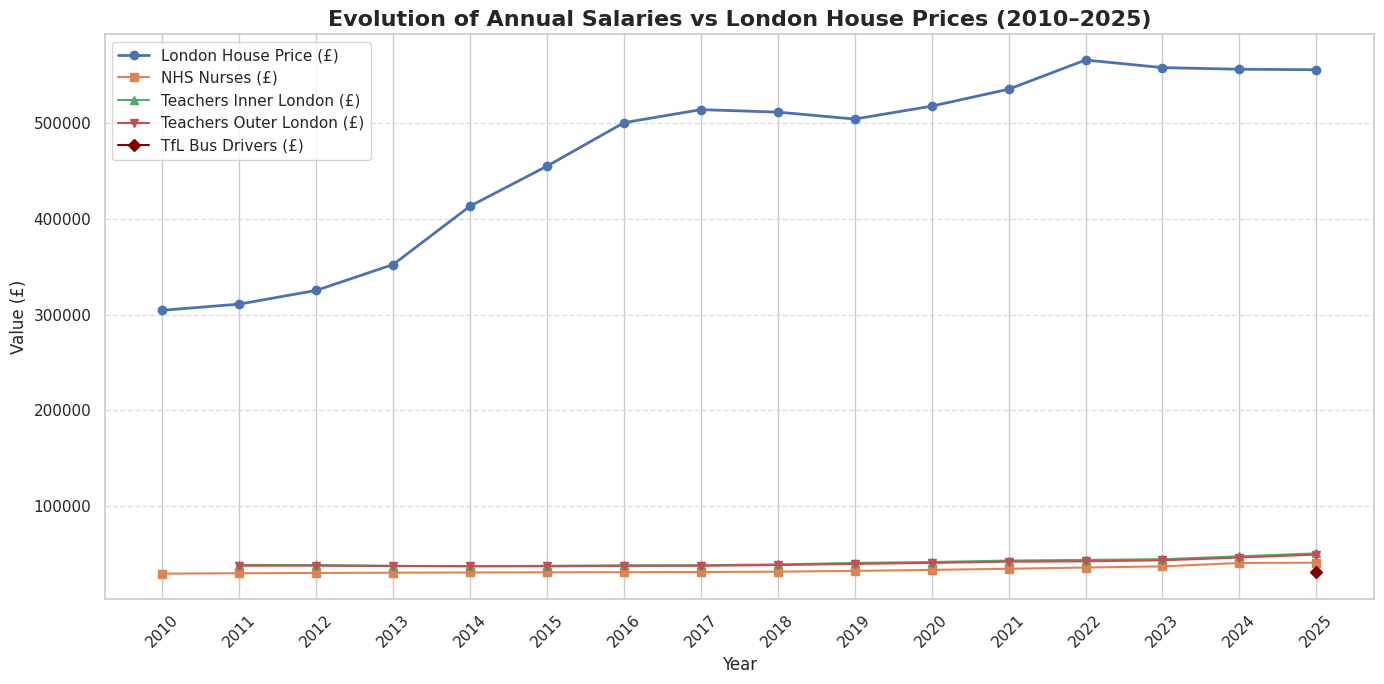

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot each salary and the London house price
plt.plot(master_df['Year'], master_df['London House Price (£)'], marker='o', label='London House Price (£)', linewidth=2)
plt.plot(master_df['Year'], master_df['NHS Nurses (£)'], marker='s', label='NHS Nurses (£)')
plt.plot(master_df['Year'], master_df['Teachers Inner London (£)'], marker='^', label='Teachers Inner London (£)')
plt.plot(master_df['Year'], master_df['Teachers Outer London (£)'], marker='v', label='Teachers Outer London (£)')
plt.plot(master_df['Year'], master_df['TfL Bus Drivers (£)'], marker='D', label='TfL Bus Drivers (£)', color='maroon')

plt.xticks(master_df['Year'], rotation=45)
plt.title('Evolution of Annual Salaries vs London House Prices (2010–2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Value (£)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 4.6 Comparative Visualization: Affordability Ratios for Key Worker Groups (2010–2025)


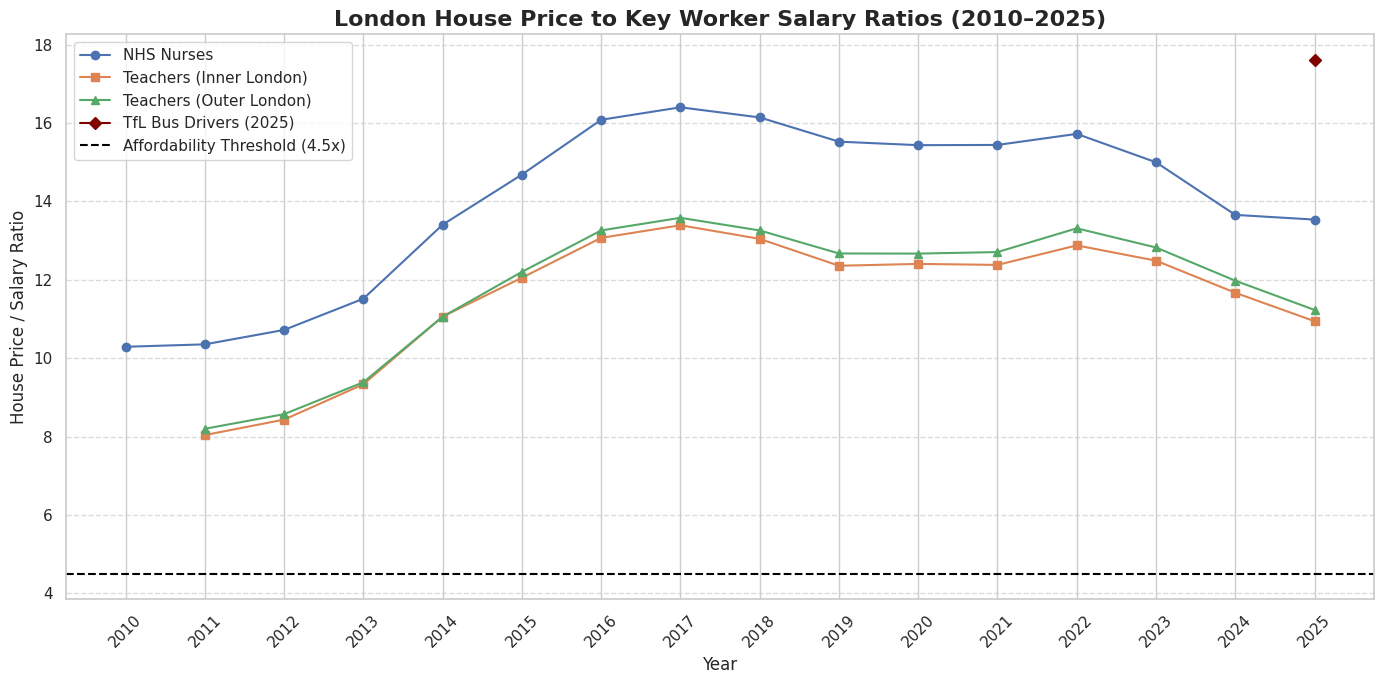

In [ ]:
plt.figure(figsize=(14, 7))

plt.plot(master_df['Year'], master_df['House Price / NHS Nurse Salary'], marker='o', label='NHS Nurses')
plt.plot(master_df['Year'], master_df['House Price / Teachers Inner London'], marker='s', label='Teachers (Inner London)')
plt.plot(master_df['Year'], master_df['House Price / Teachers Outer London'], marker='^', label='Teachers (Outer London)')
plt.plot(master_df['Year'], master_df['House Price / TfL Bus Driver'], marker='D', label='TfL Bus Drivers (2025)', color='maroon')

# Affordability threshold (e.g., 4.5x recommended by OECD)
plt.axhline(4.5, color='black', linestyle='--', linewidth=1.5, label='Affordability Threshold (4.5x)')

plt.xticks(master_df['Year'], rotation=45)
plt.title('London House Price to Key Worker Salary Ratios (2010–2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('House Price / Salary Ratio')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 4.7 Boxplot: Distribution of Affordability Ratios by Group (2010–2025)


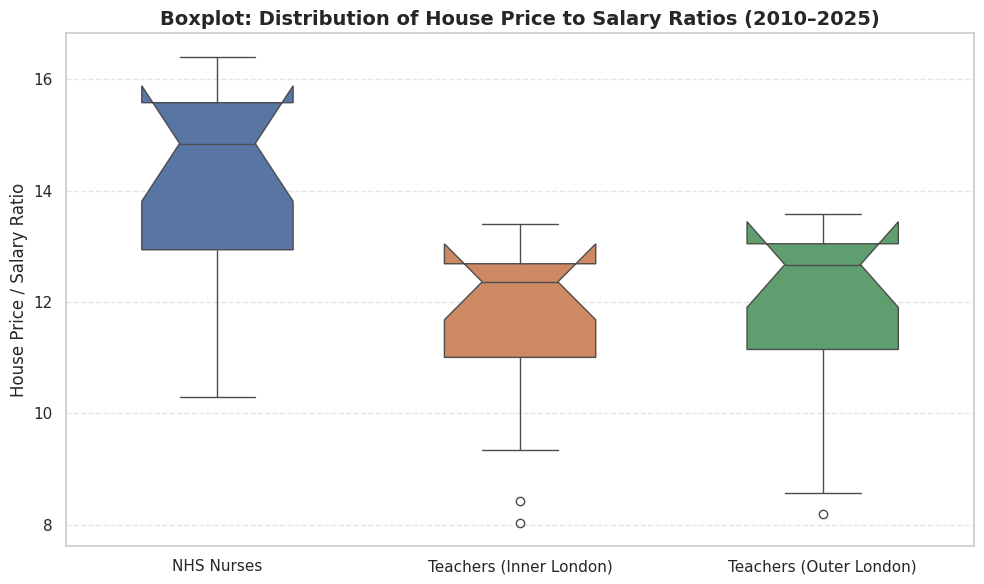

In [ ]:
import seaborn as sns

# Prepare data for boxplot
boxplot_data = [
    master_df['House Price / NHS Nurse Salary'].dropna(),
    master_df['House Price / Teachers Inner London'].dropna(),
    master_df['House Price / Teachers Outer London'].dropna()
]

plt.figure(figsize=(10, 6))
sns.boxplot(data=boxplot_data, notch=True, width=0.5)
plt.xticks([0, 1, 2], ['NHS Nurses', 'Teachers (Inner London)', 'Teachers (Outer London)'])
plt.title('Boxplot: Distribution of House Price to Salary Ratios (2010–2025)', fontsize=14, fontweight='bold')
plt.ylabel('House Price / Salary Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 4.8 Absolute Difference Between London House Price and Annual Salary (2010–2025)


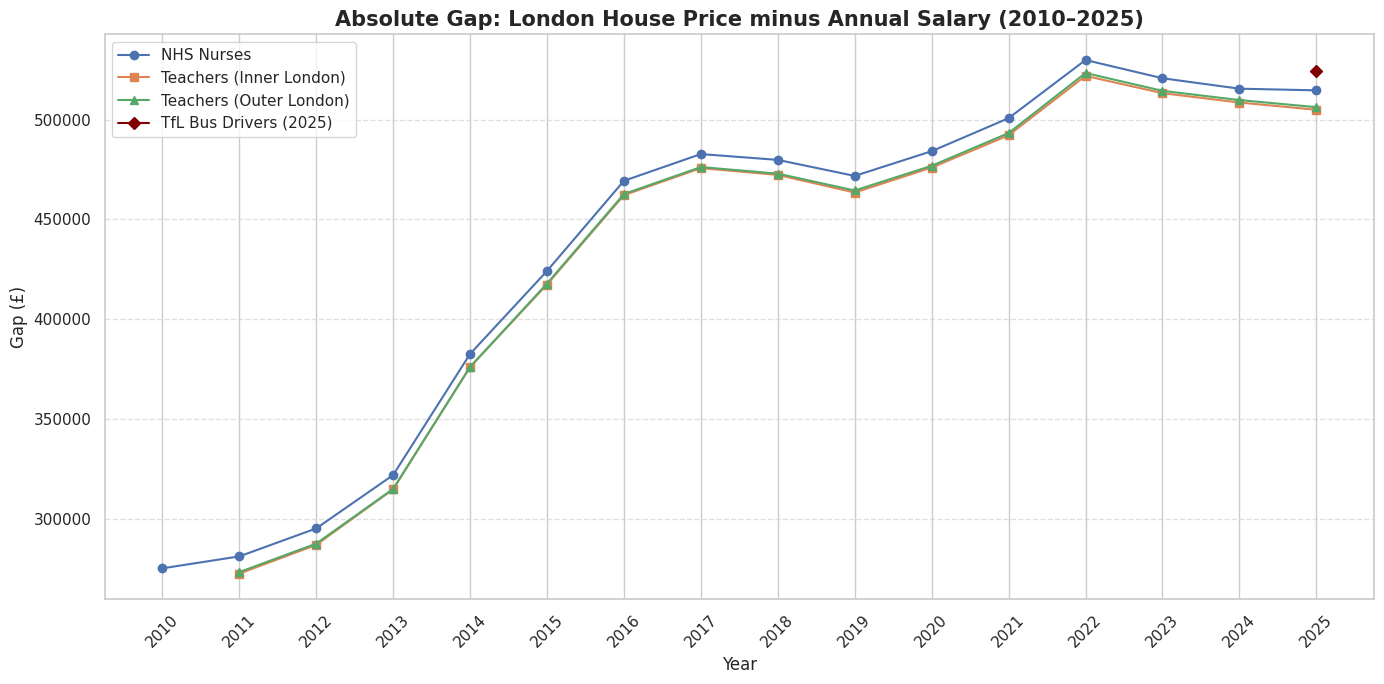

In [ ]:
# Calculate the absolute gap between London house price and each salary
master_df['Gap NHS (£)'] = master_df['London House Price (£)'] - master_df['NHS Nurses (£)']
master_df['Gap Teachers Inner (£)'] = master_df['London House Price (£)'] - master_df['Teachers Inner London (£)']
master_df['Gap Teachers Outer (£)'] = master_df['London House Price (£)'] - master_df['Teachers Outer London (£)']
master_df['Gap TfL (£)'] = master_df['London House Price (£)'] - master_df['TfL Bus Drivers (£)']

plt.figure(figsize=(14, 7))
plt.plot(master_df['Year'], master_df['Gap NHS (£)'], marker='o', label='NHS Nurses')
plt.plot(master_df['Year'], master_df['Gap Teachers Inner (£)'], marker='s', label='Teachers (Inner London)')
plt.plot(master_df['Year'], master_df['Gap Teachers Outer (£)'], marker='^', label='Teachers (Outer London)')
plt.plot(master_df['Year'], master_df['Gap TfL (£)'], marker='D', label='TfL Bus Drivers (2025)', color='maroon')

plt.xticks(master_df['Year'], rotation=45)
plt.title('Absolute Gap: London House Price minus Annual Salary (2010–2025)', fontsize=15, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Gap (£)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 4.9 Indexed Growth (2010 = 100): Salaries vs London House Prices (2010–2025)


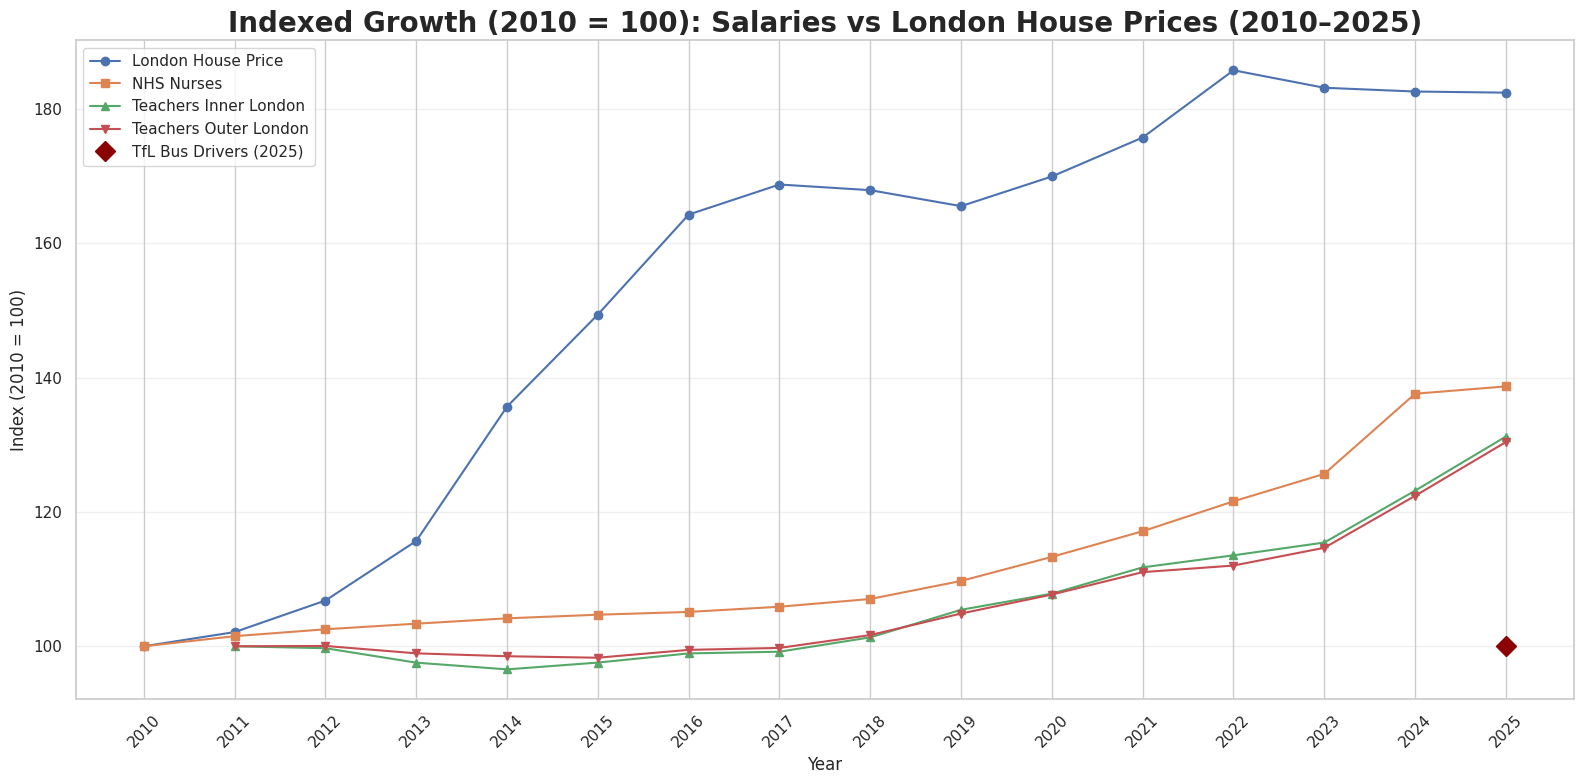

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def to_index(series):
    """Convert a numeric pandas Series to an index (2010 = 100 or first valid year = 100)."""
    first_valid = series.dropna().iloc[0]
    return (series / first_valid) * 100

plt.figure(figsize=(16,8))

plt.plot(master_df['Year'], to_index(master_df['London House Price (£)']), marker='o', label='London House Price')
plt.plot(master_df['Year'], to_index(master_df['NHS Nurses (£)']), marker='s', label='NHS Nurses')
plt.plot(master_df['Year'], to_index(master_df['Teachers Inner London (£)']), marker='^', label='Teachers Inner London')
plt.plot(master_df['Year'], to_index(master_df['Teachers Outer London (£)']), marker='v', label='Teachers Outer London')

# TfL Bus Drivers (2025 only) - special marker
if not np.isnan(master_df['TfL Bus Drivers (£)'].iloc[-1]):
    year_2025 = master_df.loc[master_df['Year'] == 2025, 'Year']
    value_2025 = master_df.loc[master_df['Year'] == 2025, 'TfL Bus Drivers (£)']
    index_2025 = (value_2025 / value_2025) * 100  # Always 100 for single point
    plt.plot(year_2025, index_2025, marker='D', color='darkred', markersize=10, linestyle='None', label='TfL Bus Drivers (2025)')

plt.title("Indexed Growth (2010 = 100): Salaries vs London House Prices (2010–2025)", fontsize=20, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Index (2010 = 100)")
plt.xticks(master_df['Year'], rotation=45)  # Show all years on the X-axis
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## 4.10 Highlight Years When Affordability Ratio Exceeds the Threshold


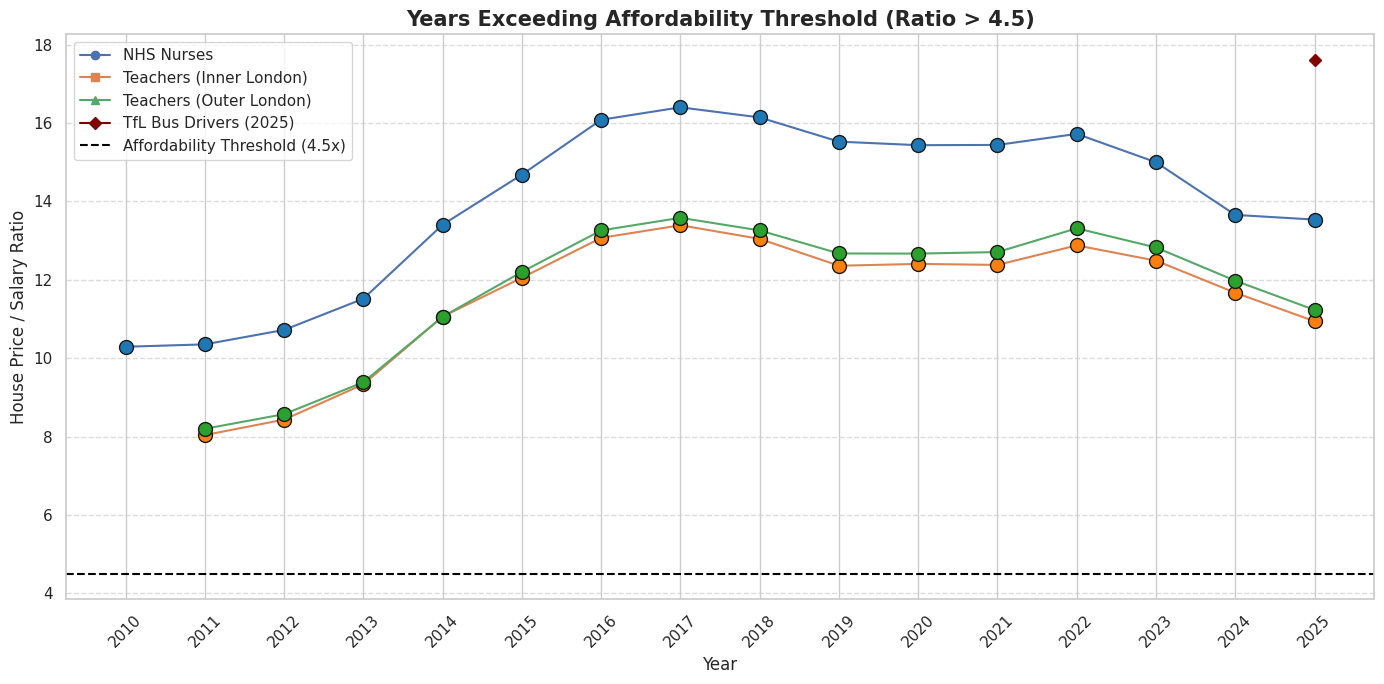

In [ ]:
plt.figure(figsize=(14, 7))
threshold = 4.5

plt.plot(master_df['Year'], master_df['House Price / NHS Nurse Salary'], marker='o', label='NHS Nurses')
plt.plot(master_df['Year'], master_df['House Price / Teachers Inner London'], marker='s', label='Teachers (Inner London)')
plt.plot(master_df['Year'], master_df['House Price / Teachers Outer London'], marker='^', label='Teachers (Outer London)')
plt.plot(master_df['Year'], master_df['House Price / TfL Bus Driver'], marker='D', label='TfL Bus Drivers (2025)', color='maroon')
plt.axhline(threshold, color='black', linestyle='--', linewidth=1.5, label='Affordability Threshold (4.5x)')

# Highlight years above threshold
for i, y in enumerate(master_df['Year']):
    for ratio, color in zip(
        [
            master_df['House Price / NHS Nurse Salary'],
            master_df['House Price / Teachers Inner London'],
            master_df['House Price / Teachers Outer London']
        ],
        ['tab:blue', 'tab:orange', 'tab:green']
    ):
        if not pd.isna(ratio.iloc[i]) and ratio.iloc[i] > threshold:
            plt.scatter(y, ratio.iloc[i], color=color, edgecolor='k', zorder=5, s=100)

plt.xticks(master_df['Year'], rotation=45)
plt.title('Years Exceeding Affordability Threshold (Ratio > 4.5)', fontsize=15, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('House Price / Salary Ratio')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 4.11 Deposit as Percentage of Salary: London House Price vs Key Worker Salaries (2010–2025)
**bold text**

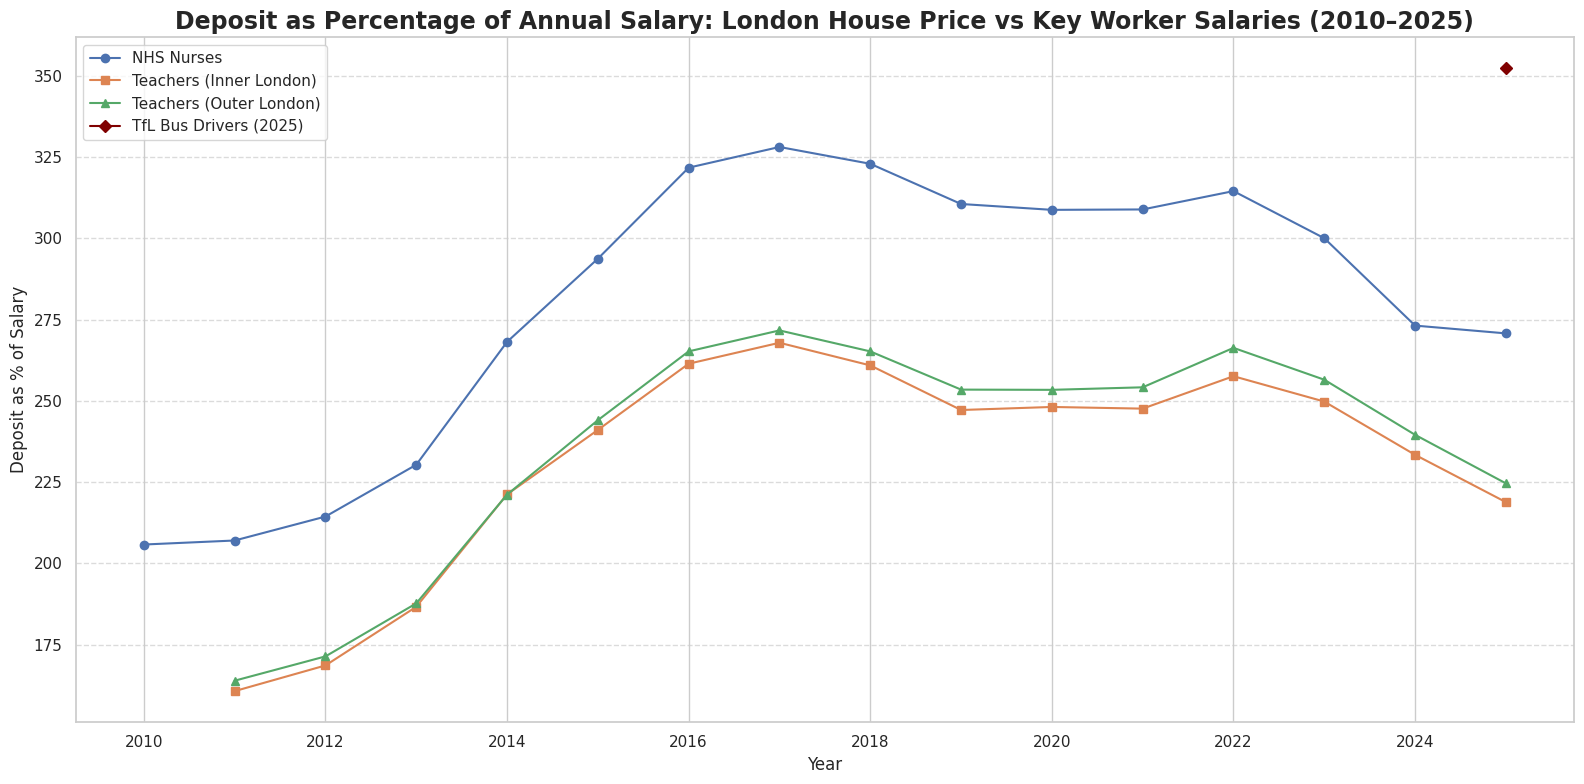

In [ ]:
# Assume a typical deposit is 20% of the average London house price
deposit_pct = 0.20

master_df['Deposit (£)'] = master_df['London House Price (£)'] * deposit_pct
master_df['Deposit / NHS Salary (%)'] = (master_df['Deposit (£)'] / master_df['NHS Nurses (£)']) * 100
master_df['Deposit / Teachers Inner (%)'] = (master_df['Deposit (£)'] / master_df['Teachers Inner London (£)']) * 100
master_df['Deposit / Teachers Outer (%)'] = (master_df['Deposit (£)'] / master_df['Teachers Outer London (£)']) * 100
master_df['Deposit / TfL (%)'] = (master_df['Deposit (£)'] / master_df['TfL Bus Drivers (£)']) * 100

plt.figure(figsize=(16,8))
plt.plot(master_df['Year'], master_df['Deposit / NHS Salary (%)'], marker='o', label='NHS Nurses')
plt.plot(master_df['Year'], master_df['Deposit / Teachers Inner (%)'], marker='s', label='Teachers (Inner London)')
plt.plot(master_df['Year'], master_df['Deposit / Teachers Outer (%)'], marker='^', label='Teachers (Outer London)')
plt.plot(master_df['Year'], master_df['Deposit / TfL (%)'], marker='D', label='TfL Bus Drivers (2025)', color='maroon')

plt.title('Deposit as Percentage of Annual Salary: London House Price vs Key Worker Salaries (2010–2025)', fontsize=17, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Deposit as % of Salary')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 4.12 Salary Coverage Ratio: Annual Salary as % of London House Price (2010–2025)


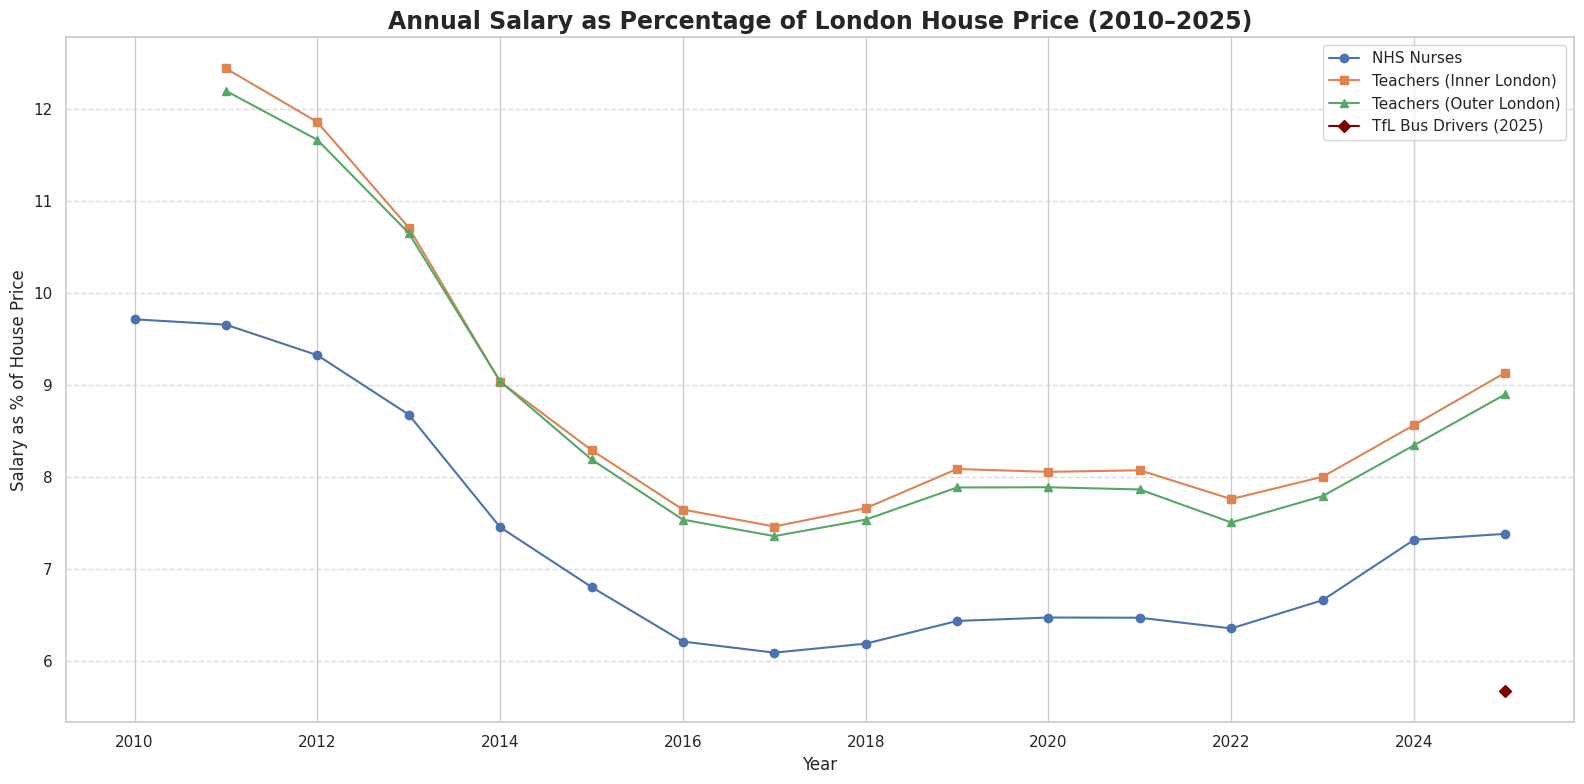

In [ ]:
# Calculate salary as a percentage of average London house price for each group
master_df['NHS % of House Price'] = (master_df['NHS Nurses (£)'] / master_df['London House Price (£)']) * 100
master_df['Teachers Inner % of House Price'] = (master_df['Teachers Inner London (£)'] / master_df['London House Price (£)']) * 100
master_df['Teachers Outer % of House Price'] = (master_df['Teachers Outer London (£)'] / master_df['London House Price (£)']) * 100
master_df['TfL % of House Price'] = (master_df['TfL Bus Drivers (£)'] / master_df['London House Price (£)']) * 100

plt.figure(figsize=(16,8))
plt.plot(master_df['Year'], master_df['NHS % of House Price'], marker='o', label='NHS Nurses')
plt.plot(master_df['Year'], master_df['Teachers Inner % of House Price'], marker='s', label='Teachers (Inner London)')
plt.plot(master_df['Year'], master_df['Teachers Outer % of House Price'], marker='^', label='Teachers (Outer London)')
plt.plot(master_df['Year'], master_df['TfL % of House Price'], marker='D', label='TfL Bus Drivers (2025)', color='maroon')

plt.title('Annual Salary as Percentage of London House Price (2010–2025)', fontsize=17, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Salary as % of House Price')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 4.13 House Price Surplus: % by Which London House Price Exceeds Key Worker Salaries (2010–2025)


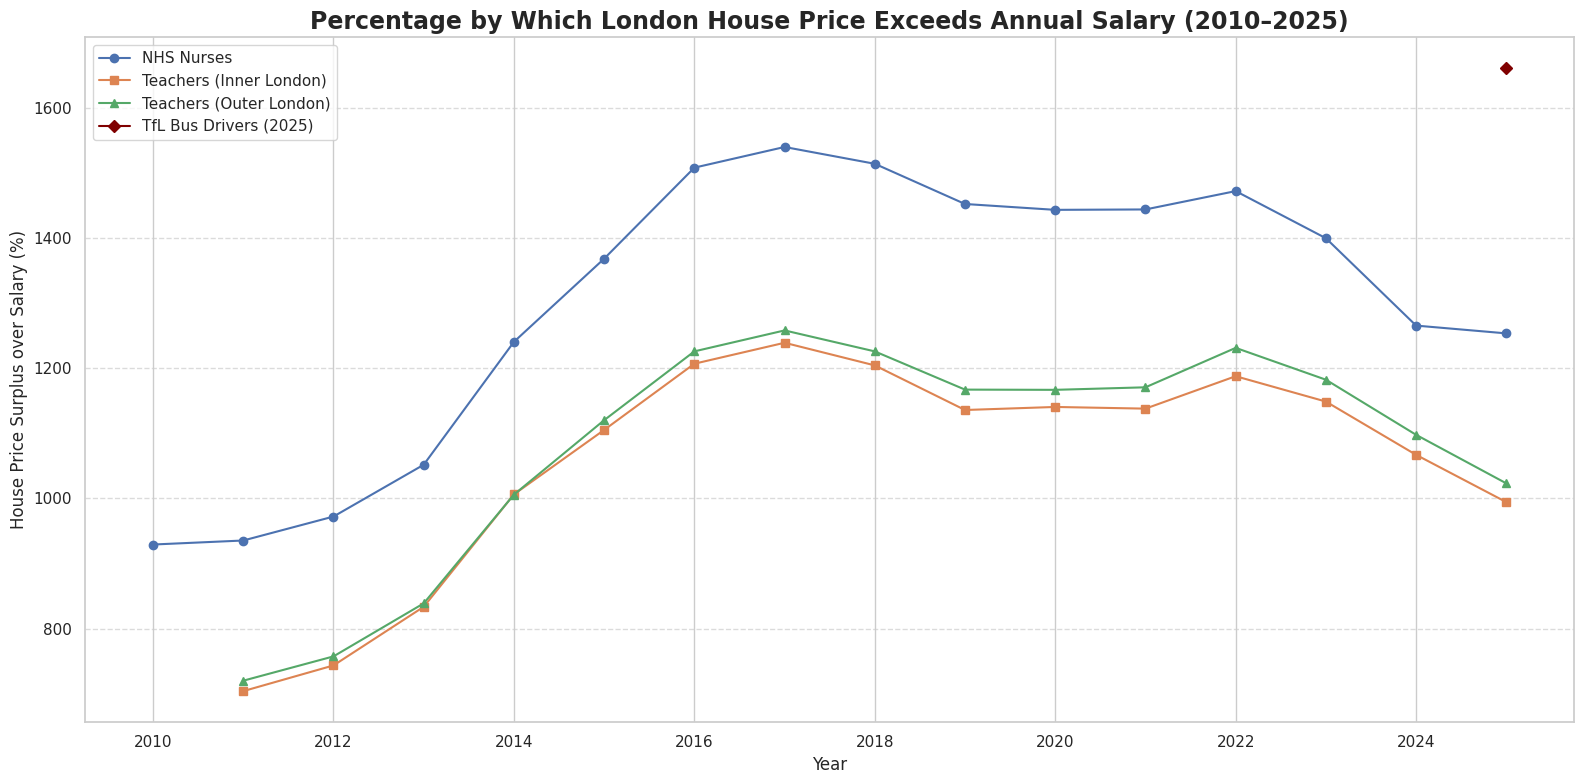

In [ ]:
# Calculate the percentage by which the house price exceeds salary
master_df['NHS House Price Surplus (%)'] = ((master_df['London House Price (£)'] - master_df['NHS Nurses (£)']) / master_df['NHS Nurses (£)']) * 100
master_df['Teachers Inner Surplus (%)'] = ((master_df['London House Price (£)'] - master_df['Teachers Inner London (£)']) / master_df['Teachers Inner London (£)']) * 100
master_df['Teachers Outer Surplus (%)'] = ((master_df['London House Price (£)'] - master_df['Teachers Outer London (£)']) / master_df['Teachers Outer London (£)']) * 100
master_df['TfL Surplus (%)'] = ((master_df['London House Price (£)'] - master_df['TfL Bus Drivers (£)']) / master_df['TfL Bus Drivers (£)']) * 100

plt.figure(figsize=(16,8))
plt.plot(master_df['Year'], master_df['NHS House Price Surplus (%)'], marker='o', label='NHS Nurses')
plt.plot(master_df['Year'], master_df['Teachers Inner Surplus (%)'], marker='s', label='Teachers (Inner London)')
plt.plot(master_df['Year'], master_df['Teachers Outer Surplus (%)'], marker='^', label='Teachers (Outer London)')
plt.plot(master_df['Year'], master_df['TfL Surplus (%)'], marker='D', label='TfL Bus Drivers (2025)', color='maroon')

plt.title('Percentage by Which London House Price Exceeds Annual Salary (2010–2025)', fontsize=17, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('House Price Surplus over Salary (%)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import os

# Ruta donde están guardados tus archivos
folder_path = '/content/drive/MyDrive/Final Project 2025/Cleaned datasets/'

# Lista de archivos que quieres inspeccionar (puedes añadir más si hace falta)
filenames = [
    "deposit_vs_salary_2025.csv",
    "threshold_breach_long.csv",
    "affordability_ratio_long.csv",
    "hpir_by_borough_2025_long.csv",
    "indexed_salaries_2010_2025.csv",
    "salaries_over_time_long.csv",
    "prices_by_borough_long_CLEAN.csv",
    "salaries_over_time.csv",
    "hpir_over_time.csv",
    "monthly_salaries.csv",
    "prices_by_borough.csv"
]

# Mostrar info de cada archivo
for file in filenames:
    print(f"\n📁 {file}")
    try:
        df = pd.read_csv(os.path.join(folder_path, file))
        print(df.info())
        print(df.head(3))
    except Exception as e:
        print(f"⚠️ Error loading {file}: {e}")



📁 deposit_vs_salary_2025.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Borough            99 non-null     object 
 1   Group              99 non-null     object 
 2   Deposit_vs_Salary  99 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.4+ KB
None
          Borough            Group  Deposit_vs_Salary
0  City of London  Salary_Teachers         232.095798
1  City of London       Salary_NHS         283.442228
2  City of London   Salary_Drivers         368.726941

📁 threshold_breach_long.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              32 non-null     int64 
 1   Group             32 non-null     object
 2   Threshold_Breach  32 non-null     b

# Data Preparation and Key Calculations for Housing Affordability Analysis

B.1 Calculation and Export of Affordability Ratio

In [ ]:
## B.1 Calculate and Export Affordability Ratio by Group (London-wide)

import pandas as pd

salaries = pd.read_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/salaries_over_time_long.csv')
prices = pd.read_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/prices_by_borough.csv')

house_prices = prices[['Year', 'LONDON']].rename(columns={'LONDON': 'London_House_Price'})

merged = salaries.merge(house_prices, on='Year', how='left')
merged['Affordability_Ratio'] = merged['London_House_Price'] / merged['Salary']

merged.to_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/affordability_ratio_long.csv', index=False)
print("Affordability ratio saved successfully.")



Affordability ratio saved successfully.


B.2 Calculation and Export of HPIR by Borough and Group

In [ ]:
## B.2 Calculate and Export HPIR by Borough and Group (2025)

import pandas as pd

prices = pd.read_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/prices_by_borough_long_CLEAN.csv')
salaries = pd.read_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/salaries_over_time_long.csv')

merged = prices.merge(salaries, on='Year', how='left')
merged['HPIR'] = merged['Price'] / merged['Salary']
merged_2025 = merged[merged['Year'] == 2025].copy()
merged_2025.to_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/hpir_by_borough_2025_long.csv', index=False)
print("HPIR by borough and group (2025) saved successfully.")


HPIR by borough and group (2025) saved successfully.


B.3 Calculation and Export of Threshold Breach Dataset

In [ ]:
## B.3 Calculate and Export Threshold Breach (Affordability > 8.5)

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/affordability_ratio_long.csv')
df['Threshold_Breached'] = df['Affordability_Ratio'] > 8.5
df.to_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/threshold_breach_long.csv', index=False)
print("Threshold breach dataset saved successfully.")


Threshold breach dataset saved successfully.


B.4 Calculation and Export of Indexed Salaries

In [ ]:
## B.4 Calculate and Export Indexed Salaries (2010 = 100)

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/salaries_over_time_long.csv')

for group in df['Group'].unique():
    group_mask = df['Group'] == group
    base_row = df[group_mask & (df['Year'] == 2010)]
    if not base_row.empty and not pd.isna(base_row['Salary'].values[0]):
        base = base_row['Salary'].values[0]
        df.loc[group_mask, 'Index'] = (df.loc[group_mask, 'Salary'] / base) * 100
    else:
        first_year = df[group_mask & df['Salary'].notnull()].sort_values('Year').iloc[0]['Year']
        base = df[(df['Group'] == group) & (df['Year'] == first_year)]['Salary'].values[0]
        df.loc[group_mask, 'Index'] = (df.loc[group_mask, 'Salary'] / base) * 100
        print(f"Warning: Group '{group}' does not have salary for 2010. Used year {first_year} as base.")

df.to_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/indexed_salaries_2010_2025.csv', index=False)
print("Indexed salaries saved successfully.")


Indexed salaries saved successfully.


B.5 Calculation and Export of Deposit vs Salary (2025)

In [ ]:
## B.5 Calculate and Export Deposit Requirement as % of Salary (2025)

import pandas as pd

salaries = pd.read_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/salaries_over_time_long.csv')
prices = pd.read_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/prices_by_borough.csv')

salaries_2025 = salaries[salaries['Year'] == 2025].copy()
price_2025 = prices[prices['Year'] == 2025]['LONDON'].values[0]

deposit = price_2025 * 0.15  # 15% deposit, adjust as needed
salaries_2025['London_House_Price'] = price_2025
salaries_2025['Deposit_15pct'] = deposit
salaries_2025['Deposit_as_Percent_of_Salary'] = (deposit / salaries_2025['Salary']) * 100

salaries_2025.to_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/deposit_vs_salary_2025.csv', index=False)
print("Deposit vs salary dataset saved successfully.")


Deposit vs salary dataset saved successfully.


B.6 Calculation and Export of Monthly Salaries Table

In [ ]:
## B.6 Calculate and Export Monthly Salaries Table (Wide Format)

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/salaries_over_time.csv')
monthly = df.copy()
for col in ['Salary_Teachers', 'Salary_NHS', 'Salary_Drivers']:
    if col in monthly.columns:
        monthly[f'Monthly {col}'] = monthly[col] / 12

monthly.to_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/monthly_salaries.csv', index=False)
print("Monthly salaries dataset saved successfully.")


Monthly salaries dataset saved successfully.


B.7 Calculation and Export of Indexed Prices by Borough

In [ ]:
## B.7 Calculate and Export Indexed House Prices by Borough (2010 = 100)

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/prices_by_borough_long_CLEAN.csv')

for borough in df['Borough'].unique():
    mask = df['Borough'] == borough
    base_row = df[mask & (df['Year'] == 2010)]
    if not base_row.empty and not pd.isna(base_row['Price'].values[0]):
        base = base_row['Price'].values[0]
        df.loc[mask, 'Index'] = (df.loc[mask, 'Price'] / base) * 100
    else:
        first_year = df[mask & df['Price'].notnull()].sort_values('Year').iloc[0]['Year']
        base = df[(df['Borough'] == borough) & (df['Year'] == first_year)]['Price'].values[0]
        df.loc[mask, 'Index'] = (df.loc[mask, 'Price'] / base) * 100
        print(f"Warning: Borough '{borough}' does not have price for 2010. Used year {first_year} as base.")

df.to_csv('/content/drive/MyDrive/Final Project 2025/Cleaned datasets/indexed_prices_2010_2025.csv', index=False)
print("Indexed house prices dataset saved successfully.")


Indexed house prices dataset saved successfully.


In [ ]:
## 4.X Load Cleaned Dataset: threshold_breach_long.csv

# Import necessary libraries
import pandas as pd

# Define the path to the dataset
file_path = '/content/drive/MyDrive/Final Project 2025/Cleaned datasets/threshold_breach_long.csv'

# Load the dataset into a DataFrame
df_threshold_breach = pd.read_csv(file_path)

# Display the shape and first few rows for verification
print("threshold_breach_long.csv:", df_threshold_breach.shape)
display(df_threshold_breach.head())




threshold_breach_long.csv: (32, 3)


,Year,Group,Threshold_Breach
0,2010,Salary_NHS,True
1,2011,Salary_Teachers,True
2,2011,Salary_NHS,True
3,2012,Salary_Teachers,True
4,2012,Salary_NHS,True


In [ ]:
## 4.X Load Cleaned Dataset: deposit_vs_salary_2025.csv

import pandas as pd
file_path = '/content/drive/MyDrive/Final Project 2025/Cleaned datasets/deposit_vs_salary_2025.csv'
df_deposit_salary = pd.read_csv(file_path)
print("deposit_vs_salary_2025.csv:", df_deposit_salary.shape)
display(df_deposit_salary.head())


deposit_vs_salary_2025.csv: (99, 3)


,Borough,Group,Deposit_vs_Salary
0,City of London,Salary_Teachers,232.095798
1,City of London,Salary_NHS,283.442228
2,City of London,Salary_Drivers,368.726941
3,Barking and Dagenham,Salary_Teachers,108.191263
4,Barking and Dagenham,Salary_NHS,132.126358


In [ ]:
## 4.X Load Cleaned Dataset: hpir_over_time.csv

import pandas as pd
file_path = '/content/drive/MyDrive/Final Project 2025/Cleaned datasets/hpir_over_time.csv'
df_hpir_over_time = pd.read_csv(file_path)
print("hpir_over_time.csv:", df_hpir_over_time.shape)
display(df_hpir_over_time.head())


hpir_over_time.csv: (32, 5)


,Year,Group,Salary,Avg_London_Price,HPIR
0,2010,Salary_NHS,29599.04000,337640.232330,11.407135
1,2011,Salary_Teachers,38321.87714,348249.348491,9.087481
2,2011,Salary_NHS,30043.63000,348249.348491,11.591454
3,2012,Salary_Teachers,38273.31036,367507.297985,9.602182
4,2012,Salary_NHS,30347.15000,367507.297985,12.110109


In [ ]:
## 4.X Load Cleaned Dataset: prices_by_borough_long_CLEAN.csv

import pandas as pd
file_path = '/content/drive/MyDrive/Final Project 2025/Cleaned datasets/prices_by_borough_long_CLEAN.csv'
df_prices_by_borough_long = pd.read_csv(file_path)
print("prices_by_borough_long_CLEAN.csv:", df_prices_by_borough_long.shape)
display(df_prices_by_borough_long.head())


prices_by_borough_long_CLEAN.csv: (528, 3)


,Year,Borough,Price
0,2010,City of London,448197.9167
1,2010,Barking and Dagenham,171212.6667
2,2010,Barnet,353351.9167
3,2010,Bexley,200868.6667
4,2010,Brent,312193.5000


In [ ]:
## 4.X Load Cleaned Dataset: indexed_salaries_2010_2025.csv

import pandas as pd
file_path = '/content/drive/MyDrive/Final Project 2025/Cleaned datasets/indexed_salaries_2010_2025.csv'
df_indexed_salaries = pd.read_csv(file_path)
print("indexed_salaries_2010_2025.csv:", df_indexed_salaries.shape)
display(df_indexed_salaries.head())


indexed_salaries_2010_2025.csv: (32, 4)


,Year,Group,Salary,Index
0,2010,Salary_NHS,29599.04000,100.0
1,2011,Salary_Teachers,38321.87714,NaN
2,2011,Salary_NHS,30043.63000,NaN
3,2012,Salary_Teachers,38273.31036,NaN
4,2012,Salary_NHS,30347.15000,NaN


In [ ]:
## 4.X Load Cleaned Dataset: salaries_over_time_long.csv

import pandas as pd
file_path = '/content/drive/MyDrive/Final Project 2025/Cleaned datasets/salaries_over_time_long.csv'
df_salaries_over_time_long = pd.read_csv(file_path)
print("salaries_over_time_long.csv:", df_salaries_over_time_long.shape)
display(df_salaries_over_time_long.head())


salaries_over_time_long.csv: (32, 3)


,Year,Group,Salary
0,2010,Salary_NHS,29599.04000
1,2011,Salary_Teachers,38321.87714
2,2011,Salary_NHS,30043.63000
3,2012,Salary_Teachers,38273.31036
4,2012,Salary_NHS,30347.15000


In [ ]:
## 4.X Load Cleaned Dataset: affordability_ratio_long.csv

import pandas as pd
file_path = '/content/drive/MyDrive/Final Project 2025/Cleaned datasets/affordability_ratio_long.csv'
df_affordability_ratio_long = pd.read_csv(file_path)
print("affordability_ratio_long.csv:", df_affordability_ratio_long.shape)
display(df_affordability_ratio_long.head())


affordability_ratio_long.csv: (32, 6)


,Year,Group,Salary,Avg_London_Price,HPIR,Threshold_Breach
0,2010,Salary_NHS,29599.04000,337640.232330,11.407135,True
1,2011,Salary_Teachers,38321.87714,348249.348491,9.087481,True
2,2011,Salary_NHS,30043.63000,348249.348491,11.591454,True
3,2012,Salary_Teachers,38273.31036,367507.297985,9.602182,True
4,2012,Salary_NHS,30347.15000,367507.297985,12.110109,True


In [ ]:
## 4.X Load Cleaned Dataset: hpir_by_borough_2025_long.csv

import pandas as pd
file_path = '/content/drive/MyDrive/Final Project 2025/Cleaned datasets/hpir_by_borough_2025_long.csv'
df_hpir_by_borough_2025 = pd.read_csv(file_path)
print("hpir_by_borough_2025_long.csv:", df_hpir_by_borough_2025.shape)
display(df_hpir_by_borough_2025.head())


hpir_by_borough_2025_long.csv: (99, 6)


,Year_borough,Borough,Group,Price,Salary,HPIR
0,2025,City of London,Salary_Teachers,775781.0000,50137.55143,15.473053
1,2025,City of London,Salary_NHS,775781.0000,41054.98000,18.896149
2,2025,City of London,Salary_Drivers,775781.0000,31559.16667,24.581796
3,2025,Barking and Dagenham,Salary_Teachers,361629.6667,50137.55143,7.212751
4,2025,Barking and Dagenham,Salary_NHS,361629.6667,41054.98000,8.808424


In [ ]:
## 4.X Load Cleaned Dataset: indexed_prices_2010_2025.csv

import pandas as pd
file_path = '/content/drive/MyDrive/Final Project 2025/Cleaned datasets/indexed_prices_2010_2025.csv'
df_indexed_prices = pd.read_csv(file_path)
print("indexed_prices_2010_2025.csv:", df_indexed_prices.shape)
display(df_indexed_prices.head())


indexed_prices_2010_2025.csv: (16, 3)


,Year,Avg_London_Price,Index
0,2010,337640.232330,100.000000
1,2011,348249.348491,103.142136
2,2012,367507.297985,108.845825
3,2013,400170.714636,118.519855
4,2014,468137.373730,138.649761


In [ ]:
## 4.X Load Cleaned Dataset: salaries_over_time.csv

import pandas as pd
file_path = '/content/drive/MyDrive/Final Project 2025/Cleaned datasets/salaries_over_time.csv'
df_salaries_over_time = pd.read_csv(file_path)
print("salaries_over_time.csv:", df_salaries_over_time.shape)
display(df_salaries_over_time.head())


salaries_over_time.csv: (16, 4)


,Year,Salary_Teachers,Salary_NHS,Salary_Drivers
0,2010,NaN,29599.04,NaN
1,2011,38321.877143,30043.63,NaN
2,2012,38273.310357,30347.15,NaN
3,2013,37648.469286,30594.27,NaN
4,2014,37373.099643,30830.39,NaN


In [ ]:
## 4.X Load Cleaned Dataset: monthly_salaries.csv

import pandas as pd
file_path = '/content/drive/MyDrive/Final Project 2025/Cleaned datasets/monthly_salaries.csv'
df_monthly_salaries = pd.read_csv(file_path)
print("monthly_salaries.csv:", df_monthly_salaries.shape)
display(df_monthly_salaries.head())


monthly_salaries.csv: (16, 4)


,Year,Monthly Salary_Teachers,Monthly Salary_NHS,Monthly Salary_Drivers
0,2010,NaN,2466.586667,NaN
1,2011,3193.489762,2503.635833,NaN
2,2012,3189.442530,2528.929167,NaN
3,2013,3137.372440,2549.522500,NaN
4,2014,3114.424970,2569.199167,NaN


In [ ]:
## 4.X Load Cleaned Dataset: prices_by_borough.csv

import pandas as pd
file_path = '/content/drive/MyDrive/Final Project 2025/Cleaned datasets/prices_by_borough.csv'
df_prices_by_borough = pd.read_csv(file_path)
print("prices_by_borough.csv:", df_prices_by_borough.shape)
display(df_prices_by_borough.head())


prices_by_borough.csv: (16, 38)


,Year,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Inner London,Outer London,LONDON,England
0,2010,448197.916667,171212.666667,353351.916667,200868.666667,312193.500000,275729.916667,508307.833333,221673.666667,313290.916667,...,339244.750000,236048.166667,310382.750000,229331.333333,429661.666667,644971.916667,373364.083333,266981.583333,304618.500000,167557.916667
1,2011,458342.250000,168030.750000,359556.750000,200666.750000,322330.166667,279621.500000,549085.416667,218416.916667,323434.916667,...,360744.000000,235580.416667,315337.750000,228095.500000,443099.500000,672415.583333,388124.000000,270457.333333,311050.500000,165440.666667
2,2012,518999.500000,170496.500000,380399.000000,202540.750000,338662.250000,286895.500000,580554.250000,224895.166667,340971.166667,...,382195.166667,241459.666667,313351.250000,238236.250000,469708.250000,740891.500000,410627.666667,279171.916667,325370.416667,167572.666667
3,2013,563142.333333,178586.000000,397522.250000,213464.416667,366201.250000,301792.333333,661057.666667,237693.083333,361717.583333,...,416390.166667,254764.500000,339255.750000,262541.083333,524793.916667,839807.833333,455234.416667,295697.500000,352391.666667,172381.500000
4,2014,700840.250000,206790.750000,456489.916667,244452.583333,425534.250000,353864.666667,749244.166667,278641.166667,427997.666667,...,493744.000000,294322.666667,419599.583333,325185.000000,624738.916667,980910.916667,539888.916667,343131.000000,413366.750000,186722.500000
